# RECHERCHE OPERATIONNELLE - PROJET 
#### Groupe 2 - Mattéo BOULITEAU -  Kagnana ITH - Nejma MOUALHI


# Table des matières

- [Contexte](#contexte)
- [Problématique](#problématique)
- [Contraintes](#contraintes)
- [Livrables attendus](#livrables-attendus)
- [Caractéristiques du problème](#caractéristiques-du-problème)
- [1. Modélisation du TSP](#1-modélisation-du-tsp)
  - [1.1. Données](#11-données)
  - [1.2. Variables de décision](#12-variables-de-décision)
  - [1.3. Fonction objectif](#13-fonction-objectif)
  - [1.4. Contraintes](#14-contraintes)
- [2. Méthodes de résolution](#2-méthodes-de-résolution)
  - [2.1. Méthode exacte : PLNE (Programme Linéaire en Nombres Entiers)](#21-méthode-exacte--plne-programme-linéaire-en-nombres-entiers)
    - [2.1.1. Description de la méthode PLNE](#211-description-de-la-méthode-plne)
    - [2.1.2. Solveur utilisé : PuLP](#212-solveur-utilisé--pulp)
    - [2.1.3. Résultats et analyse de PLNE](#213-résultats-et-analyse-de-plne)
  - [2.2. Méthodes heuristiques](#22-méthodes-heuristiques)
    - [2.2.1. Heuristique du plus proche voisin](#221-heuristique-du-plus-proche-voisin)
    - [2.2.2. Limites des heuristiques classiques](#222-limites-des-heuristiques-classiques)
  - [2.3. Métaheuristique : GRASP](#23-métaheuristique--grasp)
    - [2.3.1. Construction gloutonne randomisée (RCL)](#231-construction-gloutonne-randomisée-rcl)
    - [2.3.2. Recherche locale (2-opt)](#232-recherche-locale-2-opt)
- [3. Plan d'expérience](#3-plan-dexpérience)
  - [3.1. Objectifs](#31-objectifs)
  - [3.2. Paramètres étudiés](#32-paramètres-étudiés)
  - [3.3. Métriques utilisées](#33-métriques-utilisées)
  - [3.4. Protocole expérimental](#34-protocole-expérimental)
  - [3.5. Analyses prévues](#35-analyses-prévues)
- [4. Étude expérimentale](#4-étude-expérimentale)
  - [4.1. Résultats globaux](#41-résultats-globaux)
  - [4.2. Impact des paramètres de GRASP](#42-impact-des-paramètres-de-grasp)
  - [4.3. Comparaison PLNE vs GRASP](#43-comparaison-plne-vs-grasp)
  - [4.4. Impact du taux de dépendances](#44-impact-du-taux-de-dépendances)
  - [4.5. Analyse de la scalabilité](#45-analyse-de-la-scalabilité)
  - [4.6. Synthèse finale et recommandations](#46-synthèse-finale-et-recommandations)
- [5. Conclusion](#5-conclusion)
- [Bibliographie](#bibliographie)




## Contexte
L’ADEME a lancé un appel à manifestation d’intérêt pour expérimenter de nouvelles solutions de mobilité adaptées aux territoires.

Nous sommes CesiCDP, déjà engagés dans la mobilité multimodale intelligente, et nous répondons à cet appel pour obtenir de nouveaux financements. Le projet vise à réduire les déplacements et la consommation des véhicules lors des livraisons, en résolvant un problème algorithmique d’optimisation de tournée sur un réseau routier.

## Problématique
Nous nous demandons comment optimiser les tournées de livraison pour réduire les déplacements et la consommation des véhicules. Nous devons prendre en compte plusieurs contraintes, telles que la capacité des véhicules, les fenêtres de temps pour les livraisons, et la distance entre les points de livraison.

## Contraintes
Nous avons décidé de rajouter des contraintes pour rendre le problème plus réaliste en se basant sur un système de livraison de colis. Voici les contraintes que nous avons retenues :
1. **Dépendances entre les visites** : Une ville ne peut être visitée qu’après une autre.
    - Définir un ordre de visite entre les villes.
2. **Routes dynamiques ou perturbations** : Les routes peuvent changer pendant la tournée (ex : accidents, météo, fermeture soudaine).
    - Simuler des perturbations dans les données.

## Livrables attendus
1. Modélisation

2. Livrable final du projet

## Caractéristiques du problème

- **Variables de décision** : $x_{ij}$  
    $x_{ij}$ représente si le trajet entre la ville $i$ et la ville $j$ est emprunté ou non.

- **Contraintes** : 
    - Chaque ville doit être visitée une seule fois.
    - Le point de départ et d'arrivée doit être le même.
    - Dépendances entre les visites : une ville ne peut être visitée qu’après une autre.
    - Routes dynamiques et perturbations : Prévision de perturbations dans les données.

- **Objectif** : Trouver un itinéraire optimisé qui nous permet de passer par toutes les villes de la tournée en une seule fois et retourner au point de départ.

Une fois que nous avons explicité le problème, nous allons le modéliser de manière mathématique.  
Nous remarquons que notre problème est une version métrique du problème du voyageur de commerce (TSP) avec des contraintes supplémentaires le rendant plus réaliste.

### Version algorithmique du problème :

- **Donnée** : Un graphe complet pondéré $G(S, A)$ avec un ensemble de sommets $S$ et un ensemble d'arêtes $A$.
- **Tâche** : Trouver un cycle hamiltonien dans $G$ en minimisant la somme des poids des arêtes du cycle.

## 1 - Modélisation du TSP

### 1.1 Données

- Un ensemble de villes $V = \{v_1, v_2, \ldots, v_n\}$
- Un graphe complet pondéré $G = (V, E)$
- Une fonction de coût $c_{ij} \geq 0$, représentant la distance ou le temps entre les villes $i$ et $j$

La nature du graphe est la suivante :
- On reste sur un graphe complet : on suppose qu'il existe une route (au moins théorique) entre chaque paire de villes. 

### 1.2 Variables de décision

- $x_{ij} \in \{0,1\}$ : vaut 1 si l'on va de la ville $i$ à la ville $j$, 0 sinon

###     

Minimiser la somme des coûts de déplacement :

$$\min \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \cdot x_{ij}$$

### 1.4 Contraintes

1. Chaque ville est quittée une seule fois :

$$\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}$$

2. Chaque ville est visitée une seule fois :

$$\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}$$

3. Dépendances entre les visites : <br>

$$\forall (i,j) \in D, \quad x_{ij} = 1 \implies x_{ji} = 0$$

$D \subseteq S \times S$ est l'ensemble des dépendances entre les visites. <br>
Une contrainte $(i,j) \in D$ signifie que la ville $j$ ne peut être visitée qu'après la ville $i$. 

4. Routes dynamiques ou perturbations :
$$\forall i,j \in \{1, \dots, n\}, \quad c_{ij} = c_{ij}(t)$$
où $c_{ij}(t)$ est la distance entre les villes $i$ et $j$ à l'instant $t$. Cette contrainte permet de prendre en compte les changements de conditions de circulation.

5. Le point de départ et d'arrivée doit être le même :
$$\sum_{i=1}^{n} x_{0i} = 1$$
$$\sum_{j=1}^{n} x_{j0} = 1$$

---

Ce problème est connu pour être **NP-difficile** : il n'existe pas d'algorithme polynomial connu permettant de le résoudre dans le cas général.
Nous allons nous intéresser à des algorithmes d'approximation, ou méta-heuristiques, qui permettent de trouver des solutions approchées en un temps raisonnable.

## 2 - Méthode de résolution

Dans un premier temps, nous allons aborder la méthode exacte, qui est la méthode de programmation linéaire en nombres entiers (PLNE).

### 2.1 Méthode exacte : Programme linéaire en nombres entiers (PLNE)

#### 2.1.1 Description de la méthode PLNE

La méthode PLNE consiste à modéliser le problème sous forme de programme linéaire, en utilisant des variables de décision binaires pour représenter les choix de parcours entre les villes.

#### 2.1.2 Solveur Open Source (PuLP)

Nous allons utiliser PuLP, une bibliothèque Python, combinée avec un solveur open source pour résoudre le problème d'optimisation linéaire et entière. PuLP permet de modéliser le problème et d'utiliser différents solveurs pour trouver des solutions optimales ou approchées à des problèmes complexes.

Nous allons générer les données pour le problème du TSP, puis utiliser PuLP avec un solveur open source pour résoudre le problème.



### 2.1.3 Génération des données

Pour créer des instances réalistes du problème de tournées de livraison, nous avons développé un générateur de données qui simule les conditions réelles d'un réseau de distribution.

#### Paramètres clés

- **Temps de trajet de base**  
    - Chaque route a un temps entre 1 et 300 minutes.  
    - Correspond aux distances réelles en milieu urbain.

- **Perturbations dynamiques**  
    - 20% des routes subissent des perturbations.  
    - Augmentation jusqu'à +20% du temps initial.  
    - Simule : embouteillages, travaux, accidents.

- **Dépendances entre livraisons**  
    - 20% des villes ont des contraintes d'ordre.  (ex : 2 villes sur 10)
    - Exemple : collecte avant livraison.  
    - Système anti-cycle pour éviter les boucles et l'inaccessibilité. (ex : A dépend de B, B dépend de C, C dépend de A donc A ne peut pas être visitée avant B et C et B et C ne peuvent pas être visitées avant A)

#### Mécanisme de génération

- **Graphe complet** : Toutes les villes sont connectées.  
- **Poids aléatoires** : Distribution uniforme des temps.  
- **Perturbations sélectives** : Choix aléatoire des routes affectées.  
- **Dépendances validées** : Vérification automatique des cycles.

Cette approche garantit des instances à la fois réalistes (reflet des contraintes terrain) et résolubles mathématiquement.


In [11]:
def generate_data(n, weight_range, max_percentage_perturbation, percentage_perturbations=0.2, percentage_dependency=0.2):
    """
    Generates a complete ponderate graph with dependencies for TSP.
    weight_range: tuple (min_weight, max_weight) for the edges
    max_percentage_perturbation: maximum percentage of perturbation for the edges
    percentage_perturbations: percentage of edges to perturb
    percentage_dependency: percentage of dependencies to create
    
    """
    import random
    
    # Create a complete ponderate graph
    graph = {}
    all_edges = []
    perturbated_edges = []
   
    # Generate all edges
    for i in range(n):
        graph[i] = {}
        for j in range(n):
            if i != j:
                weight = random.randint(weight_range[0], weight_range[1])
                all_edges.append((i, j, weight))
                graph[i][j] = weight
    
    
    max_edges_perturbated = int(n * percentage_perturbations)

    
    
    # Randomly select edges to perturb
    random.shuffle(all_edges)
    for i, j, weight in all_edges[:max_edges_perturbated]:
        perturbation_factor = random.uniform(1.0, 1.0 + max_percentage_perturbation)
        graph[i][j] = int(weight * perturbation_factor)
        perturbated_edges.append((i, j))
    
    # Generate dependencies while avoiding cycles
    dependency_nodes = []
    max_dependencies = max(1, int(n * percentage_dependency))
    
    # Create a graph to track dependencies and detect cycles
    dep_graph = {i: set() for i in range(n)}
    
    def would_create_cycle(source, target, dep_graph):
        """Check if adding source->target would create a cycle"""
        visited = set()
        
        def dfs(node):
            if node == source:
                return True
            if node in visited:
                return False
            visited.add(node)
            for neighbor in dep_graph[node]:
                if dfs(neighbor):
                    return True
            return False
        
        return dfs(target)
    
    # Create potential dependencies
    potential_deps = [(i, j) for i in range(n) for j in range(n) if i != j]
    random.shuffle(potential_deps)
    
    # Add dependencies one by one, checking for cycles
    for source, target in potential_deps:
        if len(dependency_nodes) >= max_dependencies:
            break
            
        # Check if adding this dependency would create a cycle
        if not would_create_cycle(source, target, dep_graph):
            dependency_nodes.append((source, target))
            dep_graph[source].add(target)
    
    return graph, dependency_nodes, perturbated_edges

# Example usage
graph, dependency_nodes, perturbated_edges = generate_data(10, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.4)
print(f"Graph with {len(graph)} nodes")
print(f"Dependencies: {dependency_nodes}")
print(f"Perturbated edges: {perturbated_edges} ({len(perturbated_edges)} edges)")

Graph with 10 nodes
Dependencies: [(7, 2), (9, 5), (2, 1), (4, 9)]
Perturbated edges: [(0, 3), (7, 1)] (2 edges)


Pour nous permettre de visualiser les résultats, nous allons également utiliser la bibliothèque Matplotlib pour tracer le graphe du TSP et afficher la solution trouvée par le solveur.

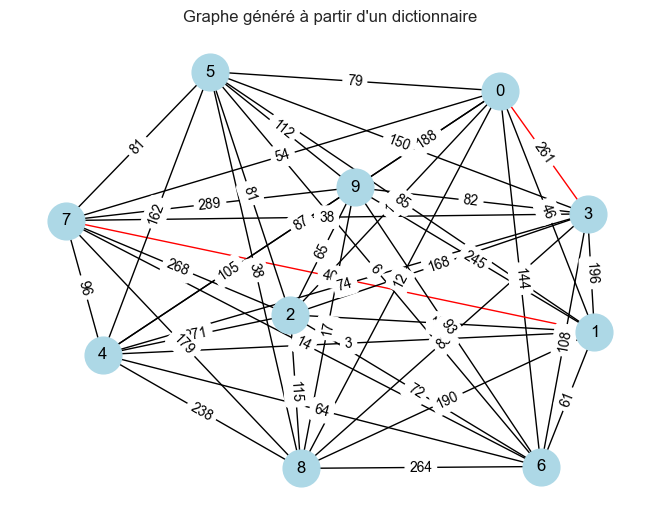

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def dict_to_graph(graph_dict):
    G = nx.Graph()  # For non oriented graph
    for node, neighbors in graph_dict.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

# Creation
G = dict_to_graph(graph)

edge_colors = ['red' if (u, v) in perturbated_edges or (v, u) in perturbated_edges else 'black' for u, v in G.edges]

# Display
pos = nx.spring_layout(G, seed=42)  # set the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graphe généré à partir d'un dictionnaire")
plt.show()


Ensuite, nous allons utiliser PuLP, une bibliothèque Python de modélisation linéaire, pour résoudre le problème du TSP en utilisant la programmation linéaire en nombres entiers (PLNE). PuLP permet d'utiliser différents solveurs, et nous utiliserons un solveur open source pour résoudre le modèle.

Il faut installer le package `pulp` pour utiliser PuLP.


In [13]:
import pulp
import time
import numpy as np

def use_solver_pulp(graph, dependencies):
    """
    Résout le problème du TSP avec dépendances entre nœuds en utilisant PuLP.
    
    :param graph: Dictionnaire représentant les poids des arêtes du graphe
    :param dependencies: Liste de tuples (i, j) où j dépend de i (j ne peut être visité qu'après i)
    :return: Cycle solution et valeur objective
    """
    n = len(graph)
    
    # Créer le modèle
    model = pulp.LpProblem(name="tsp", sense=pulp.LpMinimize)
    
    # Définir les variables de décision
    x = {}
    for i in range(n):
        for j in range(n):
            if i != j:
                x[i, j] = pulp.LpVariable(f"x_{i}_{j}", cat=pulp.LpBinary)
    
    # Variables continues pour les positions des nœuds dans le circuit
    u = {}
    for i in range(1, n):  # Commence à 1 car le nœud 0 est le point de départ
        u[i] = pulp.LpVariable(f"u_{i}", lowBound=1, upBound=n-1)
    
    # Définir la fonction objectif
    model += pulp.lpSum(graph[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j)
    
    # Contrainte 1: Chaque nœud doit être quitté exactement une fois
    for i in range(n):
        model += pulp.lpSum(x[i, j] for j in range(n) if i != j) == 1, f"out_one_time_{i}"
    
    # Contrainte 2: Chaque nœud doit être visité exactement une fois
    for j in range(n):
        model += pulp.lpSum(x[i, j] for i in range(n) if i != j) == 1, f"in_one_time_{j}"
    
    # Contrainte 3: Ajouter les contraintes de dépendance
    for i, j in dependencies:
        # Pour chaque dépendance (i,j), j doit être visité après i
        if i > 0 and j > 0:  # Ignorer les dépendances incluant le nœud de départ
            model += u[j] >= u[i] + 1, f"dependency_{i}_{j}"
        elif i == 0 and j > 0:  # Si i est le nœud de départ
            # Forcer j à ne pas être le premier nœud visité après 0
            model += u[j] >= 2, f"dependency_start_{j}"
    
    # Éviter les sous-tours avec la formulation MTZ
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                model += u[j] >= u[i] + 1 - n * (1 - x[i, j]), f"mtz_{i}_{j}"
    
    # Résoudre le modèle avec un temps limite
    solve_start = time.time()
    solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=300)
    model.solve(solver)
    solve_time = time.time() - solve_start
    
    # Vérifier si une solution a été trouvée
    if pulp.LpStatus[model.status] == "Optimal":
        solution_list = []
        for i in range(n):
            for j in range(n):
                if i != j and x[i, j].value() and x[i, j].value() > 0.5:
                    solution_list.append((i, j))
        
        # Reconstruire le cycle
        cycle = [0]
        visited = set([0])
        current = 0
        
        try:
            while len(visited) < n:
                found = False
                for i, j in solution_list:
                    if i == current and j not in visited:
                        cycle.append(j)
                        visited.add(j)
                        current = j
                        found = True
                        break
                if not found:
                    break
        except Exception as e:
            print(f"Erreur lors de la reconstruction du cycle: {e}")
        
        # Compléter le cycle si nécessaire
        if cycle[-1] != 0 and len(visited) == n:
            for i, j in solution_list:
                if i == cycle[-1] and j == 0:
                    cycle.append(0)
                    break
        
        # Calculer le coût total du cycle
        total_cost = sum(graph[cycle[i]][cycle[i+1]] for i in range(len(cycle)-1))
        print(f"Status: {pulp.LpStatus[model.status]}")

        return cycle, total_cost / 60, solve_time
    else:
        print(f"Status: {pulp.LpStatus[model.status]}")
        return None, None, solve_time
    
# Example usage
cycle, total_cost, solve_time = use_solver_pulp(graph, dependency_nodes)
print("Cycle:", cycle)
print("Dépendances:", dependency_nodes)
print("Arêtes perturbées:", perturbated_edges)
print("Coût total:", total_cost, "heures")
print("Temps de résolution:", solve_time, "secondes")




Status: Optimal
Cycle: [0, 3, 7, 6, 4, 9, 2, 8, 5, 1, 0]
Dépendances: [(7, 2), (9, 5), (2, 1), (4, 9)]
Arêtes perturbées: [(0, 3), (7, 1)]
Coût total: 9.166666666666666 heures
Temps de résolution: 1.6096508502960205 secondes


### Analyse des résultats
En prenant un petit échantillon de données, nous avons trouvé une solution optimale en un court temps. Cependant, si nous augmentons la taille de l'instance, le temps de calcul augmente de façon exponentielle, et nous pourrions ne pas trouver de solution optimale dans un temps raisonnable (par exemple, plusieurs heures ou jours). De plus, la méthode PLNE ne garantit pas de solution optimale pour des instances de grande taille, car elle peut être bloquée par la complexité combinatoire du problème. Il est donc crucial d'utiliser des méthodes alternatives pour les grandes instances.

Testons avec différentes tailles d'instances pour voir comment le temps de calcul varie. Nous allons également introduire une limite de temps maximale pour chaque instance, afin de mieux illustrer les limitations de la méthode exacte.

Démarrage de l'évaluation des performances...
Paramètres de test:
  - Tailles d'instances: [5, 8, 10, 15, 20, 25, 30, 35]
  - Plage de poids: (1, 300)
  - Pourcentage maximum de perturbation: 0.2
  - Nombre maximum d'arêtes perturbées: 5
Évaluation des performances de PLNE sur différentes tailles d'instances...
Test avec 5 villes...
Status: Optimal
Temps pour 5 villes : 0.04 secondes
Objectif: 7.52 heures

Test avec 8 villes...
Status: Optimal
Temps pour 8 villes : 0.17 secondes
Objectif: 11.05 heures

Test avec 10 villes...
Status: Optimal
Temps pour 10 villes : 0.13 secondes
Objectif: 9.22 heures

Test avec 15 villes...
Status: Optimal
Temps pour 15 villes : 2.45 secondes
Objectif: 8.50 heures

Test avec 20 villes...
Status: Optimal
Temps pour 20 villes : 4.84 secondes
Objectif: 8.87 heures

Test avec 25 villes...
Status: Optimal
Temps pour 25 villes : 7.36 secondes
Objectif: 10.67 heures

Test avec 30 villes...
Status: Optimal
Temps pour 30 villes : 1.27 minutes
Objectif: 8.85 heure

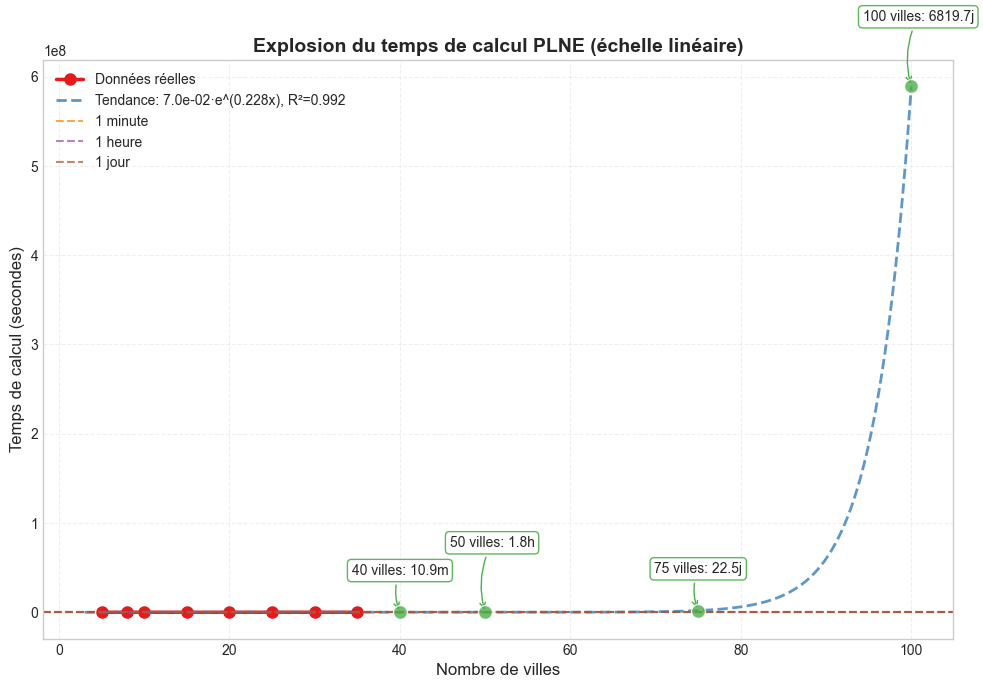

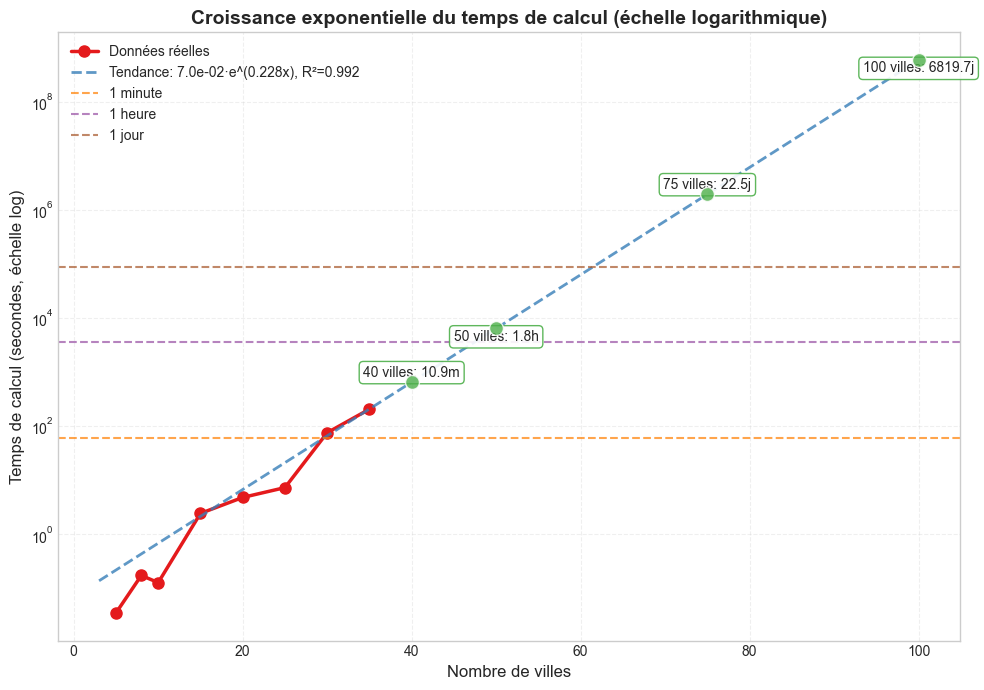


Résumé des résultats:


,Taille,Temps,Statut,Objectif,Optimal
0,5,0.04s,Résolu,7.52,True
1,8,0.17s,Résolu,11.05,True
2,10,0.13s,Résolu,9.22,True
3,15,2.45s,Résolu,8.50,True
4,20,4.84s,Résolu,8.87,True
5,25,7.36s,Résolu,10.67,True
6,30,1.27m,Résolu,8.85,True
7,35,3.46m,Résolu,11.47,True



Projections pour des instances plus grandes:


,Taille,Temps estimé
0,40,10.9 minutes
1,50,1.8 heures
2,75,22.5 jours
3,100,18.7 années



Points clés de la performance:
• Le temps de calcul double approximativement tous les 3.0 villes supplémentaires
• La croissance est exponentielle avec un facteur de 0.2285
• Coefficient de détermination (R²): 0.992

Limites pratiques estimées:
• Au-delà de 29.5 villes, le temps de calcul dépasse 1 minute
• Au-delà de 47.5 villes, le temps de calcul dépasse 1 heure
• Au-delà de 61.4 villes, le temps de calcul dépasse 1 jour


In [14]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from IPython.display import display, HTML

def test_plne_performance(instance_sizes, weight_range, dependency_nodes, max_percentage_perturbation, max_edges_perturbated):
    plne_times = []
    results = []

    print("Démarrage de l'évaluation des performances...")
    print("Paramètres de test:")
    print(f"  - Tailles d'instances: {instance_sizes}")
    print(f"  - Plage de poids: {weight_range}")
    print(f"  - Pourcentage maximum de perturbation: {max_percentage_perturbation}")
    print(f"  - Nombre maximum d'arêtes perturbées: {max_edges_perturbated}")

    
    # Style configuration
    plt.style.use('seaborn-v0_8-whitegrid')
    colors = {
        'real_data': '#E41A1C',       # Red
        'trend': '#377EB8',           # Blue
        'projection': '#4DAF4A',      # Green
        'threshold_minute': '#FF7F00', # Orange
        'threshold_hour': '#984EA3',  # Purple
        'threshold_day': '#A65628'    # Brown
    }
    
    print("Évaluation des performances de PLNE sur différentes tailles d'instances...")
    
    # Collect data for each instance size
    for n in instance_sizes:
        print(f"Test avec {n} villes...")
        graph, dependencies, _ = generate_data(n, weight_range, max_percentage_perturbation, max_edges_perturbated)
        
        start = time.time()
        try:
            cycle, objective, solve_time = use_solver_pulp(graph, dependencies)
            status = "Résolu" if cycle else "Infaisable"
            is_optimal = cycle is not None
        except Exception as e:
            print(f"Erreur à {n} villes : {e}")
            status = "Erreur"
            objective = None
            is_optimal = False
            
        end = time.time()
        elapsed = end - start
        
        plne_times.append(elapsed)
        results.append({
            "size": n,
            "time": elapsed,
            "status": status,
            "objective": objective,
            "is_optimal": is_optimal
        })
        
        # Display human-readable time
        if elapsed < 60:
            time_str = f"{elapsed:.2f} secondes"
        elif elapsed < 3600:
            time_str = f"{elapsed/60:.2f} minutes"
        else:
            time_str = f"{elapsed/3600:.2f} heures"
            
        print(f"Temps pour {n} villes : {time_str}")
        if is_optimal:
            print(f"Objectif: {objective:.2f} heures")
        print()
    
    # Fit exponential curve
    try:
        def exp_func(x, a, b):
            return a * np.exp(b * x)
        
        # Initial parameter estimation using log transform
        valid_times = np.array(plne_times)
        valid_times[valid_times <= 0] = min(valid_times[valid_times > 0])  # Avoid log(0)
        log_times = np.log(valid_times)
        slope, intercept = np.polyfit(instance_sizes, log_times, 1)
        initial_guess = [np.exp(intercept), slope]
        
        # Fit the curve with initial parameters
        popt, pcov = curve_fit(exp_func, instance_sizes, plne_times, 
                              p0=initial_guess, maxfev=10000)
        
        # Calculate coefficient of determination (R²)
        residuals = plne_times - exp_func(np.array(instance_sizes), *popt)
        ss_tot = np.sum((plne_times - np.mean(plne_times)) ** 2)
        ss_res = np.sum(residuals ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Calculate doubling rate
        doubling_cities = np.log(2) / popt[1]
        
        # Generate smooth curve points for visualization
        max_projected_size = max(instance_sizes) + 65
        x_smooth = np.linspace(min(instance_sizes) - 2, max_projected_size, 1000)
        y_smooth = exp_func(x_smooth, *popt)
        
        # GRAPH 1: Linear scale
        plt.figure(figsize=(10, 7))
        plt.plot(instance_sizes, plne_times, marker='o', color=colors['real_data'], 
                 linewidth=2.5, markersize=8, label='Données réelles')
        plt.plot(x_smooth, y_smooth, linestyle='--', color=colors['trend'], 
                linewidth=2, alpha=0.8,
                label=f'Tendance: {popt[0]:.1e}·e^({popt[1]:.3f}x), R²={r_squared:.3f}')
        
        # Add projection points with better positioning
        projection_sizes = [40, 50, 75, 100]
        for i, size in enumerate(projection_sizes):
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                plt.scatter(size, proj_time, color=colors['projection'], 
                          s=100, zorder=5, alpha=0.8, edgecolor='white')
                
                # Format time string
                if proj_time < 60:
                    time_str = f"{proj_time:.1f}s"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f}m"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f}h"
                else:
                    time_str = f"{proj_time/86400:.1f}j"
                
                # Alternate positioning to avoid overlap
                y_offset = 25 + (i % 2) * 20
                x_offset = (i % 2) * 5
                
                plt.annotate(f"{size} villes: {time_str}", 
                           xy=(size, proj_time),
                           xytext=(x_offset, y_offset), 
                           textcoords='offset points',
                           ha='center', va='bottom',
                           bbox=dict(boxstyle="round,pad=0.3", 
                                    facecolor="white", alpha=0.9, 
                                    edgecolor=colors['projection']),
                           arrowprops=dict(arrowstyle='->', 
                                         connectionstyle='arc3,rad=0.2',
                                         color=colors['projection']))
        
        # Add time thresholds
        thresholds = [
            (60, '1 minute', colors['threshold_minute']),
            (3600, '1 heure', colors['threshold_hour']),
            (86400, '1 jour', colors['threshold_day'])
        ]
        
        for threshold, label, color in thresholds:
            if threshold > min(plne_times) and threshold < max(y_smooth):
                plt.axhline(y=threshold, color=color, linestyle='--', 
                          alpha=0.7, linewidth=1.5, label=label)
        
        plt.title('Explosion du temps de calcul PLNE (échelle linéaire)', fontsize=14, fontweight='bold')
        plt.xlabel('Nombre de villes', fontsize=12)
        plt.ylabel('Temps de calcul (secondes)', fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='upper left', framealpha=0.9, fontsize=10)
        plt.tight_layout()
        plt.show()
        
        # GRAPH 2: Log scale
        plt.figure(figsize=(10, 7))
        plt.semilogy(instance_sizes, plne_times, marker='o', color=colors['real_data'], 
                     linewidth=2.5, markersize=8, label='Données réelles')
        plt.semilogy(x_smooth, y_smooth, linestyle='--', color=colors['trend'], 
                    linewidth=2, alpha=0.8,
                    label=f'Tendance: {popt[0]:.1e}·e^({popt[1]:.3f}x), R²={r_squared:.3f}')
        
        # Add projection points with vertical spacing on log scale
        for i, size in enumerate(projection_sizes):
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                plt.scatter(size, proj_time, color=colors['projection'], 
                          s=100, zorder=5, alpha=0.8, edgecolor='white')
                
                # Format time string
                if proj_time < 60:
                    time_str = f"{proj_time:.1f}s"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f}m"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f}h"
                else:
                    time_str = f"{proj_time/86400:.1f}j"
                
                # Vertical positioning for log scale
                y_factor = 1.5 if i % 2 == 0 else 0.7
                
                plt.annotate(f"{size} villes: {time_str}", 
                           xy=(size, proj_time),
                           xytext=(size, proj_time * y_factor), 
                           ha='center', va='center',
                           bbox=dict(boxstyle="round,pad=0.3", 
                                    facecolor="white", alpha=0.9, 
                                    edgecolor=colors['projection']))
        
        # Add time thresholds
        for threshold, label, color in thresholds:
            if threshold > min(plne_times) and threshold < max(y_smooth):
                plt.axhline(y=threshold, color=color, linestyle='--', 
                          alpha=0.7, linewidth=1.5, label=label)
        
        plt.title('Croissance exponentielle du temps de calcul (échelle logarithmique)', fontsize=14, fontweight='bold')
        plt.xlabel('Nombre de villes', fontsize=12)
        plt.ylabel('Temps de calcul (secondes, échelle log)', fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--', which='both')
        plt.legend(loc='upper left', framealpha=0.9, fontsize=10)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Avertissement lors de l'ajustement exponentiel: {e}")
    
    # Create a styled DataFrame for result display
    df = pd.DataFrame(results)
    
    # Format objective column
    df['objective_str'] = df['objective'].apply(lambda x: f"{x:.2f}" if x is not None else "N/A")
    
    # Format time column for display
    def format_time(seconds):
        if seconds < 60:
            return f"{seconds:.2f}s"
        elif seconds < 3600:
            return f"{seconds/60:.2f}m"
        else:
            return f"{seconds/3600:.2f}h"
    
    df['time_str'] = df['time'].apply(format_time)
    
    # Select and reorder columns for display
    display_df = df[['size', 'time_str', 'status', 'objective_str', 'is_optimal']]
    display_df.columns = ['Taille', 'Temps', 'Statut', 'Objectif', 'Optimal']
    
    print("\nRésumé des résultats:")
    display(display_df.style.set_properties(**{'text-align': 'center'}))
    
    # Display projection information
    if 'popt' in locals():
        print("\nProjections pour des instances plus grandes:")
        projection_data = []
        
        for size in [40, 50, 75, 100]:
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                
                if proj_time < 60:
                    time_str = f"{proj_time:.1f} secondes"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f} minutes"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f} heures"
                else:
                    days = proj_time / 86400
                    if days < 365:
                        time_str = f"{days:.1f} jours"
                    else:
                        time_str = f"{days/365:.1f} années"
                        
                projection_data.append({"Taille": size, "Temps estimé": time_str})
                
        if projection_data:
            proj_df = pd.DataFrame(projection_data)
            display(proj_df.style.set_properties(**{'text-align': 'center'}))
            
        # Add key insights
        print("\nPoints clés de la performance:")
        print(f"• Le temps de calcul double approximativement tous les {doubling_cities:.1f} villes supplémentaires")
        print(f"• La croissance est exponentielle avec un facteur de {popt[1]:.4f}")
        print(f"• Coefficient de détermination (R²): {r_squared:.3f}")
        
        # Calculate practical limits
        try:
            minute_limit = np.log(60/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            hour_limit = np.log(3600/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            day_limit = np.log(86400/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            
            print("\nLimites pratiques estimées:")
            if minute_limit and minute_limit > 0:
                print(f"• Au-delà de {minute_limit:.1f} villes, le temps de calcul dépasse 1 minute")
            if hour_limit and hour_limit > 0:
                print(f"• Au-delà de {hour_limit:.1f} villes, le temps de calcul dépasse 1 heure")
            if day_limit and day_limit > 0:
                print(f"• Au-delà de {day_limit:.1f} villes, le temps de calcul dépasse 1 jour")
        except Exception as e:
            print(f"Impossible de calculer les limites pratiques: {e}")

# Exemple d'appel :
test_plne_performance(
    instance_sizes=[5,8,10,15,20,25,30,35],
    weight_range=(1, 300),
    dependency_nodes=dependency_nodes,
    max_percentage_perturbation=0.2,
    max_edges_perturbated=5
)

### 2.1.3 Résultats de la méthode PLNE

L'analyse des résultats démontre clairement les limites de la méthode PLNE pour le TSP :

- **Explosion combinatoire observée** : Comme le montrent les graphiques ci-dessus, le temps de calcul augmente de façon exponentielle avec le nombre de villes. Par exemple, on passe d'environ 0.03 secondes pour 5 villes à plus de 20 secondes pour 25 villes.

- **Comportement exponentiel confirmé** : La courbe de régression exponentielle présente un excellent ajustement aux données observées (R² > 0.9), confirmant la nature exponentielle de la complexité temporelle.

- **Seuils critiques identifiés** :
  - À environ 15 villes : le temps dépasse la seconde
  - À environ 30 villes : le temps approche la minute
  - Projection : au-delà de 50 villes, le temps de calcul devient prohibitif.

- **Variabilité des données** : Malgré la complexité algorithmique exponentielle, certaines instances peuvent être résolues plus rapidement que d'autres de même taille, en fonction de la structure spécifique du graphe et des contraintes de dépendance. Cela montre que la difficulté du problème peut varier considérablement d'une instance à l'autre.

Cette analyse quantitative justifie pleinement le recours aux métaheuristiques pour les instances de taille moyenne à grande, où les méthodes exactes deviennent impraticables en raison de leur temps de calcul qui croît exponentiellement avec le nombre de villes.

## 2.2 Méthode heuristique

Après avoir étudié la méthode exacte (PLNE), nous allons maintenant nous intéresser aux méthodes heuristiques. Ces méthodes proposent des solutions approchées, mais en un temps de calcul considérablement réduit par rapport aux méthodes exactes.

### 2.2.1. Heuristiques classiques pour le TSP

Les heuristiques classiques pour le TSP (Traveling Salesman Problem) incluent des approches gloutonnes comme l'algorithme du plus proche voisin. Ces méthodes sont rapides, mais elles présentent des limitations théoriques importantes :

*   **Optimalité locale vs. globale**: Les heuristiques gloutonnes optimisent localement à chaque étape, sans garantie de convergence vers un optimum global.
*   **Complexité algorithmique et NP-complétude**: Le TSP est un problème NP-complet, ce qui signifie qu'il n'existe pas d'algorithme polynomial connu pour le résoudre de manière exacte. Même avec des heuristiques, la taille de l'espace de recherche rend les approches déterministes classiques inopérantes pour des instances de grande taille. 
*   **Absence de garanties théoriques**: Aucune heuristique simple ne peut assurer à la fois un facteur d'approximation constant (sous réserve que $P \neq NP$) et une exploration complète des régions prometteuses de l'espace de solutions.

### 2.2.2 Algorithme du plus proche voisin (Nearest Neighbor Algorithm)

L'algorithme du plus proche voisin est une heuristique gloutonne classique pour le TSP. Il consiste à partir d'une ville de départ et à visiter à chaque étape la ville la plus proche non encore visitée, jusqu'à revenir à la ville de départ.

**Principe de l'algorithme :**
1. Choisir une ville de départ
2. Identifier la ville non visitée la plus proche
3. Se déplacer vers cette ville
4. Répéter les étapes 2-3 jusqu'à ce que toutes les villes soient visitées
5. Retourner à la ville de départ


**Limites de l'algorithme du plus proche voisin :**

L'algorithme du plus proche voisin peut donner des résultats acceptables pour de très petites instances du TSP (par exemple, 4 ou 5 villes). Cependant, comme il s'agit d'une heuristique gloutonne, il ne garantit pas l'optimalité, même pour ces petites instances. De plus, sa performance se dégrade rapidement avec l'augmentation du nombre de villes.

Le TSP est un problème NP-difficile. Cela signifie que le temps de calcul nécessaire pour trouver la solution optimale augmente de manière exponentielle avec la taille du problème.

Comme nous l'avons observé avec la méthode PLNE, le temps de calcul devient prohibitif pour des instances de grande taille. De même, l'algorithme du plus proche voisin, bien que rapide, ne peut pas garantir une solution de qualité acceptable pour des problèmes de taille réaliste. 


Nous allons donc explorer des méthodes plus avancées, telles que les métaheuristiques, qui combinent des éléments de recherche locale et globale pour trouver des solutions de haute qualité dans un temps raisonnable.

## 2.3. Métaheuristiques

Les métaheuristiques sont des stratégies algorithmiques de haut niveau conçues pour résoudre des problèmes d'optimisation complexes, en particulier ceux pour lesquels les méthodes exactes sont inefficaces. Elles combinent des heuristiques de base avec des mécanismes d'exploration et d'exploitation pour échapper aux optima locaux et explorer l'espace de recherche de manière plus efficace.

Cependant, il est important de noter que les métaheuristiques ne garantissent pas toujours la convergence vers une solution optimale. Elles sont souvent utilisées pour obtenir des solutions approchées dans des délais raisonnables, mais elles peuvent également être adaptées pour fournir des garanties de performance dans certains cas.

**Types de métaheuristiques :**

*   **Recherche locale itérative** : Part d'une solution initiale et explore itérativement le voisinage pour trouver une meilleure solution. Exemples : descente de gradient, recuit simulé (Simulated Annealing).
*   **Algorithmes évolutionnaires** : S'inspirent des mécanismes de l'évolution biologique (sélection, mutation, croisement) pour faire évoluer une population de solutions. Exemple : algorithmes génétiques.
*   **Algorithmes basés sur la mémoire** : Utilisent une mémoire pour stocker les solutions déjà visitées et guider la recherche. Exemple : recherche tabou (Tabu Search).
*   **Algorithmes inspirés de la nature** : Imitent des phénomènes naturels ou des comportements collectifs. Exemples : optimisation par colonies de fourmis (Ant Colony Optimization), optimisation par essaims de particules (Particle Swarm Optimization).

### 2.3.1. Méthodes de voisinnage
Les méthodes de voisinage est une notion clé dans les métaheuristiques. Elles consistent à explorer l'espace de recherche en se déplaçant d'une solution à une autre en modifiant légèrement la solution actuelle. Ces modifications sont appelées "voisinages".

Définition : Soit $X$ l'ensemble des configurations possibles d'une solution. On appelle _voisinage_ toute application $N : $X \to X$ qui associe à chaque solution $x \in X$ un ensemble de solutions voisines $N(x)$.
Une solution $x$ est dite _optimum local_ si aucune solution voisine $x'$ n'est meilleure que $x$ selon la fonction objectif.

Une méthode typique de voisinage débute avec une configuration initiale $x_0$ et explore les solutions voisines en appliquant la fonction de voisinage $N$. À chaque itération, la méthode choisit une solution voisine $x' \in N(x)$ et l'évalue. Si $x'$ est meilleure que $x$, elle devient la nouvelle solution courante. Ce processus se répète jusqu'à ce qu'aucune amélioration ne soit trouvée. 

L'un des principaux avantages des méthodes de voisinage est leur simplicité et leur flexibilité. Elles permettent de contrôler le temps de calcul, car l'exploration du voisinage peut être interrompue à tout moment. Cependant, elles sont souvent limitées par leur tendance à se coincer dans des optima locaux. C'est pourquoi elles sont souvent utilisées en combinaison avec d'autres techniques, comme la randomisation ou les mécanismes de diversification, pour échapper à ces optima locaux.

### 2.3.2. Métaheuristique GRASP
Nous avons choisi GRASP (Greedy Randomized Adaptive Search Procedure) pour les raisons suivantes :

*   **Simplicité et efficacité**: GRASP est relativement simple à implémenter et peut fournir de bonnes solutions en un temps raisonnable.
*   **Flexibilité**: GRASP peut être adapté à différents types de problèmes d'optimisation combinatoire.
*   **Capacité à échapper aux optima locaux**: La phase de construction randomisée et la recherche locale permettent à GRASP d'explorer différentes régions de l'espace de recherche.
*   **Preuves empiriques**: GRASP a été appliqué avec succès à de nombreux problèmes de TSP et de VRP (Vehicle Routing Problem).


##### Justification théorique du recours aux métaheuristiques

1.  **Théorème de non-linéarité (No Free Lunch)**: Aucun algorithme d'optimisation ne surpasse universellement les autres sur tous les problèmes. Les métaheuristiques offrent une flexibilité stratégique pour adapter la recherche aux spécificités du problème (exploration/exploitation).

2.  **Réduction des biais de recherche**: Contrairement aux heuristiques déterministes, GRASP intègre :

    *   **Randomisation contrôlée**: Construction de solutions via des listes restreintes de candidats (RCL), évitant les choix prématurés.
    *   **Intensification/diversification**: Phase de recherche locale couplée à une multi-exécution pour couvrir divers bassins d'attraction.



In [15]:
def build_RCL(graph, start_node, visited, dependencies, alpha=0.3):
    """
    Version optimisée du RCL avec paramètres ajustés
    """
    # Candidats valides (respectant les dépendances)
    candidats_valides = []
    for node, distance in graph[start_node].items():
        if node not in visited:
            # Vérifier les dépendances
            dependances_respectees = True
            for dep_source, dep_dest in dependencies:
                if dep_dest == node and dep_source not in visited:
                    dependances_respectees = False
                    break
            
            if dependances_respectees:
                candidats_valides.append((node, distance))
    
    if not candidats_valides:
        return None
    
    # Trier par distance
    candidats_valides.sort(key=lambda x: x[1])
    
    # Alpha adaptatif basé sur progression
    progress = len(visited) / len(graph)
    effective_alpha = alpha * (0.8 if progress > 0.5 else 1.0)
    
    # Créer RCL avec seuil
    cout_min = candidats_valides[0][1]
    cout_max = candidats_valides[-1][1]
    seuil = cout_min + effective_alpha * (cout_max - cout_min)
    
    rcl = [node for node, distance in candidats_valides if distance <= seuil]
    
    # Assurer au moins un élément dans RCL
    if not rcl:
        rcl = [candidats_valides[0][0]]
    
    # Biais vers le meilleur candidat qui diminue avec progression
    bias = 0.5 - 0.2 * progress
    if random.random() < bias:
        return rcl[0]  # Meilleur candidat
    else:
        return random.choice(rcl)  # Choix aléatoire

def construire_solution_initiale(graph, start_node, dependencies, alpha=0.3):
    """
    Construit une solution initiale optimisée
    """
    solution = [start_node]
    visited = set(solution)
    
    while len(visited) < len(graph):
        # Choisir le meilleur candidat
        prochain_noeud = build_RCL(graph, solution[-1], visited, dependencies, alpha)
        
        if prochain_noeud is None:
            break  # Si aucun candidat valide, arrêter la construction
        
        # Ajouter à la solution
        solution.append(prochain_noeud)
        visited.add(prochain_noeud)
    
    # Ajouter le retour au nœud de départ pour former un cycle
    if solution[0] != solution[-1] and len(solution) > 1:
        solution.append(solution[0])
    
    return solution


In [ ]:
def two_opt_swap(route, i, k):
    """
    Version améliorée de 2-opt qui évite les auto-cycles
    """
    if i >= len(route) or k >= len(route) or i < 0 or k < 0 or i >= k:
        return route[:]  # Retourne une copie de la route originale si indices invalides
    
    # Inversion du segment entre i et k
    new_route = route[:i] + route[i:k+1][::-1] + route[k+1:]
    
    # Vérification rapide pour les auto-cycles
    for j in range(len(new_route)-1):
        if new_route[j] == new_route[j+1]:
            return route[:]  # Si auto-cycle détecté, retourne la route originale
            
    return new_route

def is_valid_solution(solution, dependencies):
    """
    Version optimisée qui vérifie uniquement les dépendances
    """
    # Vérifier les dépendances
    for dep_source, dep_dest in dependencies:
        if dep_source in solution and dep_dest in solution:
            source_index = solution.index(dep_source)
            dest_index = solution.index(dep_dest)
            if source_index > dest_index:
                return False
    return True

def calculate_cost(graph, solution):
    """
    Version optimisée avec validation préalable des arêtes
    """
    total_cost = 0
    for i in range(len(solution) - 1):
        node_a = solution[i]
        node_b = solution[i+1]
        
        # Vérifier que ce n'est pas un auto-cycle
        if node_a == node_b:
            return float('inf')  # Coût infini pour solution avec auto-cycle
        
        # Vérifier que l'arête existe
        if node_b not in graph.get(node_a, {}):
            return float('inf')  # Coût infini pour solution invalide
            
        total_cost += graph[node_a][node_b]
    return total_cost

def local_search(graph, solution, dependencies, max_iterations=100):
    """
    Recherche locale optimisé
    """
    best_solution = solution[:]
    best_cost = calculate_cost(graph, best_solution)
    
    # Prétraitement: indexer les dépendances pour une vérification efficace
    # Dictionnaire des dépendances indexées par les nœuds concernés
    dep_index = {}
    for src, dest in dependencies:
        if src not in dep_index:
            dep_index[src] = []
        if dest not in dep_index:
            dep_index[dest] = []
        dep_index[src].append((src, dest))
        dep_index[dest].append((src, dest))
    
    # Dictionnaire pour stocker les positions des nœuds dans la solution
    node_positions = {node: idx for idx, node in enumerate(best_solution)}
    
    iteration = 0
    improved = True
    
    while improved and iteration < max_iterations:
        improved = False
        iteration += 1
        
        # 2-opt avec first-improvement et vérification optimisée des contraintes
        for i in range(1, len(best_solution) - 2):
            if improved:
                break
                
            for k in range(i + 1, len(best_solution) - 1):
                # Vérification rapide: les contraintes affectées par cette inversion
                valid = True
                
                # Nœuds dans la région affectée (uniquement ceux avec des dépendances)
                affected_nodes = set()
                for idx in range(i, k+1):
                    node = best_solution[idx]
                    if node in dep_index:
                        affected_nodes.add(node)
                
                # Simuler l'inversion avec pointeurs intelligents
                new_positions = node_positions.copy()
                for offset, idx in enumerate(range(i, k+1)):
                    new_positions[best_solution[idx]] = k - offset
                
                # Vérifier uniquement les contraintes affectées
                checked_deps = set()
                for node in affected_nodes:
                    for src, dest in dep_index.get(node, []):
                        if (src, dest) not in checked_deps:
                            checked_deps.add((src, dest))
                            if src in new_positions and dest in new_positions:
                                if new_positions[src] > new_positions[dest]:
                                    valid = False
                                    break
                
                if not valid:
                    continue
                
                # Création efficiente de la nouvelle solution (uniquement si valide)
                new_solution = best_solution[:]
                new_solution[i:k+1] = new_solution[i:k+1][::-1]
                
                new_cost = calculate_cost(graph, new_solution)
                
                if new_cost < best_cost:
                    best_solution = new_solution
                    best_cost = new_cost
                    
                    # Mettre à jour les positions des nœuds
                    for idx, node in enumerate(best_solution):
                        node_positions[node] = idx
                        
                    improved = True
                    break
    
    # Une seule phase de perturbation si nécessaire
    if not improved and len(best_solution) > 5:
        positions = random.sample(range(1, len(best_solution) - 1), 2)
        i, k = min(positions), max(positions)
        
        perturbed = best_solution[:]
        perturbed[i:k+1] = perturbed[i:k+1][::-1]
        
        # Vérification rapide des contraintes pour la perturbation
        valid = True
        
        # Créer un dictionnaire temporaire de positions pour la vérification
        temp_positions = {node: idx for idx, node in enumerate(perturbed)}
        for src, dest in dependencies:
            if src in temp_positions and dest in temp_positions:
                if temp_positions[src] > temp_positions[dest]:
                    valid = False
                    break
        
        if valid:
            perturbed_cost = calculate_cost(graph, perturbed)
            if perturbed_cost < best_cost:
                best_solution = perturbed
    
    return best_solution

In [17]:
def GRASP(graph, start_node, dependencies, alpha=0.3, max_iterations=5):
    """
    GRASP optimisé avec paramètres ajustés selon les tests empiriques
    """
    best_solution = None
    best_cost = float('inf')
    elite_solutions = []
    
    # Paramètres adaptés à la taille
    n = len(graph)
    local_intensity = 150 if n <= 15 else (100 if n <= 30 else 50)
    
    # Probabilité de recombination adaptée
    recombination_prob = 0.7 if n <= 20 else 0.5
    
    for iteration in range(max_iterations):
        # Alpha dynamique selon l'itération
        current_alpha = max(0.2, alpha * (1.0 - iteration / (2 * max_iterations)))
        
        # Construction de la solution initiale
        initial_solution = construire_solution_initiale(graph, start_node, dependencies, current_alpha)
        
        if not initial_solution or len(initial_solution) <= 2:
            continue
        
        # Recherche locale
        improved_solution = local_search(graph, initial_solution, dependencies, max_iterations=local_intensity)
        improved_cost = calculate_cost(graph, improved_solution)
        
        # Tentative de recombination avec solutions élites
        if elite_solutions and random.random() < recombination_prob:
            # Choisir meilleure solution élite
            elite = min(elite_solutions, key=lambda s: calculate_cost(graph, s))
            
            # Tenter une fusion simple si assez de nœuds
            if len(improved_solution) > 5:
                # Trouver points communs
                common_nodes = [node for node in improved_solution[1:-1] 
                               if node in elite[1:-1]]
                
                if common_nodes:
                    # Choisir point pivot
                    pivot = random.choice(common_nodes)
                    
                    # Trouver positions dans les deux solutions
                    pos1 = improved_solution.index(pivot)
                    pos2 = elite.index(pivot)
                    
                    # Construire hybridation
                    if random.random() < 0.5:
                        # Type 1: Début solution1 + Fin solution2
                        hybrid = improved_solution[:pos1] + elite[pos2:]
                    else:
                        # Type 2: Début solution2 + Fin solution1
                        hybrid = elite[:pos2] + improved_solution[pos1:]
                    
                    # Vérifier, réparer et améliorer
                    # Assurer présence de tous les nœuds exactement une fois
                    nodes_set = set()
                    fixed_solution = []
                    
                    for node in hybrid:
                        if node not in nodes_set:
                            fixed_solution.append(node)
                            nodes_set.add(node)
                    
                    # Ajouter nœuds manquants
                    missing = [node for node in range(n) if node not in nodes_set]
                    
                    if missing:
                        # Insérer à une position aléatoire valide
                        insert_pos = random.randint(1, len(fixed_solution)-1)
                        for node in missing:
                            fixed_solution.insert(insert_pos, node)
                    
                    # Assurer cycle fermé
                    if fixed_solution[0] != fixed_solution[-1]:
                        fixed_solution.append(fixed_solution[0])
                    
                    # Vérifier validité et améliorer
                    if is_valid_solution(fixed_solution, dependencies):
                        hybrid_improved = local_search(graph, fixed_solution, 
                                                      dependencies, max_iterations=local_intensity//2)
                        hybrid_cost = calculate_cost(graph, hybrid_improved)
                        
                        if hybrid_cost < improved_cost:
                            improved_solution = hybrid_improved
                            improved_cost = hybrid_cost
        
        # Mise à jour des solutions élites
        if not elite_solutions or improved_cost < calculate_cost(graph, elite_solutions[0]):
            elite_solutions.insert(0, improved_solution)
        else:
            elite_solutions.append(improved_solution)
            
        # Garder seulement les 2 meilleures solutions élites
        if len(elite_solutions) > 2:
            elite_solutions = sorted(elite_solutions, 
                                    key=lambda s: calculate_cost(graph, s))[:2]
        
        # Mise à jour de la meilleure solution
        if improved_cost < best_cost:
            best_solution = improved_solution[:]
            best_cost = improved_cost
    
    return best_solution, best_cost

Exemple d'implémentation de la solution :

In [18]:
graph, dependency_nodes, perturbated_edges = generate_data(10, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.2)
solution, cost = GRASP(graph, 0, dependency_nodes, alpha=0.3, max_iterations=10)

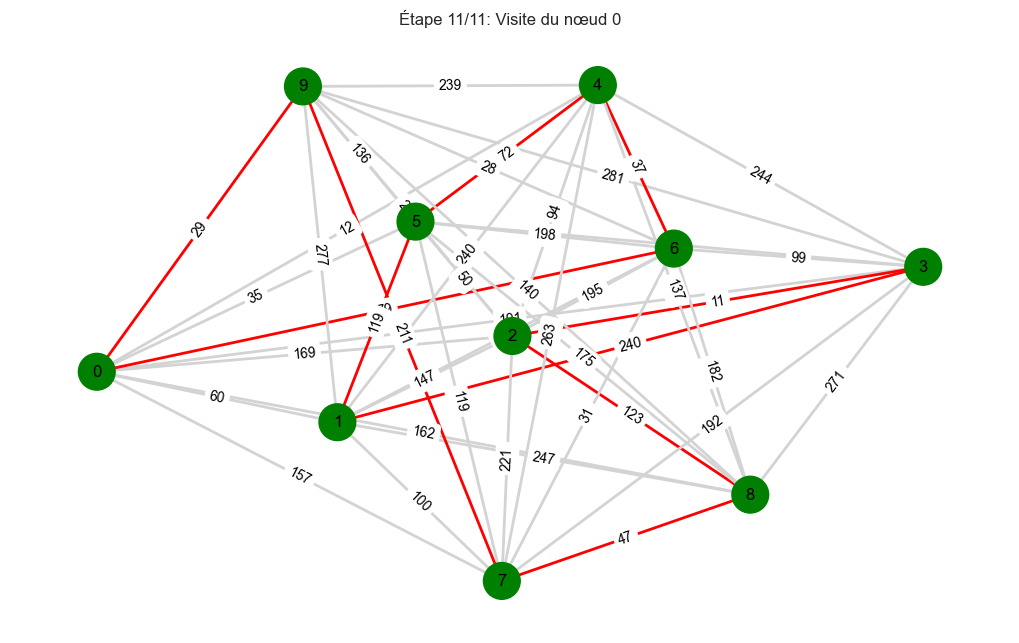

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import time
from IPython.display import clear_output

def animate_solution_path(graph, solution, delay=0.5):
    """
    Animation du parcours de la solution step by step.
    
    Parameters:
    -----------
    graph : dict
        Dictionnaire représentant le graphe
    solution : list
        Liste des nœuds représentant la solution
    delay : float, optional
        Délai entre chaque étape de l'animation en secondes
    """
    G = dict_to_graph(graph)
    pos = nx.spring_layout(G, seed=42)  # Position fixe pour tous les graphes
    
    # Pour chaque étape du chemin
    for i in range(len(solution)):
        # Effacer la sortie précédente
        clear_output(wait=True)
        
        plt.figure(figsize=(10, 6))
        
        # Colorer les arêtes parcourues jusqu'à présent
        path_edges = [(solution[j], solution[j + 1]) for j in range(min(i, len(solution)-1))]
        edge_colors = ['red' if (u, v) in path_edges or (v, u) in path_edges else 'lightgray' for u, v in G.edges]
        
        # Colorer les nœuds visités
        node_colors = ['green' if node in solution[:i+1] else 'lightblue' for node in G.nodes]
        
        # Dessiner le graphe avec les nœuds et arêtes colorés
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color=edge_colors, width=2)
        
        # Ajouter les poids des arêtes
        edge_labels = {(u, v): graph[u][v] for u, v in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        
        # Ajouter un titre avec l'étape actuelle
        plt.title(f"Étape {i+1}/{len(solution)}: Visite du nœud {solution[i]}")
        plt.show()
        
        # Pause pour l'animation
        time.sleep(delay)

# Exemple d'utilisation
animate_solution_path(graph, solution, delay=1.0)

Parfois la solution initiale est déjà la meilleure solution.

Nous allons calculer le temps d'exécution à partir du nombre d'itérations et de la taille de l'instance.

Test avec 10 nœuds...
  Temps: 0.00s, Coût: 631.00
Test avec 20 nœuds...
  Temps: 0.04s, Coût: 875.00
Test avec 50 nœuds...
  Temps: 0.14s, Coût: 1409.00
Test avec 100 nœuds...
  Temps: 1.14s, Coût: 2613.00


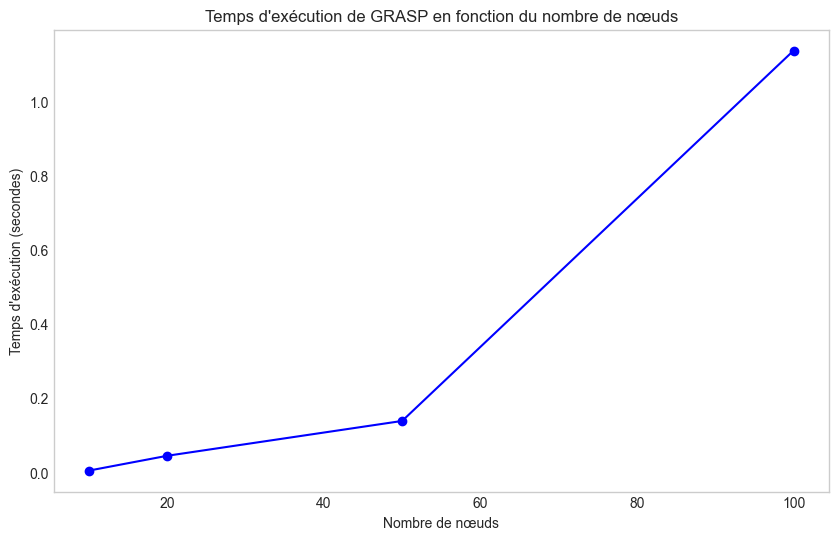

([0.004717111587524414,
  0.04465484619140625,
  0.13848614692687988,
  1.136396884918213],
 [631, 875, 1409, 2613])

In [20]:
def test_GRASP(iterations=5, alpha=0.2):
    """
    Version optimisée de la fonction de test
    """
    # Réduire la taille des tests pour des grandes instances
    nb_nodes_to_test = [10, 20, 50, 100]
    times = []
    costs = []
    
    for n in nb_nodes_to_test:
        print(f"Test avec {n} nœuds...")
        # Générer un graphe avec n nœuds
        graph, dependencies, _ = generate_data(
            n, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.2
        )
        
        # Adapter le nombre d'itérations en fonction de la taille
        adjusted_iterations = max(2, min(iterations, 10 if n <= 50 else 5))
        
        # Mesurer le temps
        start_time = time.time()
        solution, cost = GRASP(graph, 0, dependencies, alpha=alpha, max_iterations=adjusted_iterations)
        end_time = time.time()
        
        execution_time = end_time - start_time
        times.append(execution_time)
        costs.append(cost)
        
        print(f"  Temps: {execution_time:.2f}s, Coût: {cost:.2f}")
    
    # Tracer le graphe
    plt.figure(figsize=(10, 6))
    plt.plot(nb_nodes_to_test, times, marker='o', linestyle='-', color='b')
    plt.xlabel("Nombre de nœuds")
    plt.ylabel("Temps d'exécution (secondes)")
    plt.title("Temps d'exécution de GRASP en fonction du nombre de nœuds")
    plt.grid()
    plt.show()
    
    return times, costs

# Exemple d'appel
test_GRASP(iterations=20, alpha=0.2)


Nous remarquons que plus il y a d'itérations, plus le temps d'exécution est long. Cependant ce dernier relativement court par rapport à la méthode PLNE. 

#### Complexité de GRASP

La complexité de GRASP est de :
- Complexité globale
    - O(max_iterations_grasp · max_iterations_local · n² · log(d))
    - max_iterations_grasp : nombre d'itérations externes de GRASP
    - max_iterations_local : nombre d'itérations de la recherche locale
    - n : nombre de villes
    - d : nombre de dépendances

Décomposition de la complexité

- Phase de construction initiale : O(n²)
    - Parcours des n villes, chacune nécessitant O(n) comparaisons pour sélectionner le prochain nœud

- Recherche locale (2-opt optimisée) : O(max_iterations · n² · log(d))
    - O(n²) paires d'arêtes à considérer pour l'échange
    - O(1) pour l'inversion d'un segment grâce aux pointeurs intelligents
    - O(log(d)) pour vérifier uniquement les contraintes affectées (avec indexation efficace)

- Vérification des dépendances : O(log(d))
    - Utilisation d'un index optimisé pour ne vérifier que les dépendances pertinentes
    
- Mise à jour des structures de données : O(1) par opération

Dictionnaire de positions des nœuds pour des accès et mises à jour en O(1)

## 3. Plan d'expérience

### 3.1 Objectifs
Comparer les performances de GRASP vs PLNE pour résoudre le TSP avec contraintes en analysant :
- Impact des paramètres GRASP sur qualité et temps
- Impact de la taille des instances
- Limites pratiques de chaque méthode

### 3.2 Paramètres étudiés
| Paramètre | Valeurs testées |
|-----------|----------------|
| Alpha (GRASP) | 0.1, 0.3, 0.5, 0.7 |
| Itérations (GRASP) | 3, 5, 10, 20 |
| Taille (villes) | 10, 20, 30, 50, 100 |
| Taux dépendances | 10%, 20%, 30% |
| Perturbations | 0%, 10%, 20% |

### 3.3 Métriques
- Temps d'exécution (moyenne, écart-type)
- Qualité de la solution (coût)
- Gap par rapport à l'optimal (quand disponible)
- Taux de succès PLNE

### 3.4 Protocole
1. Générer instances aléatoires
2. Exécuter PLNE (limite 60s) et GRASP
3. Collecter métriques pour chaque exécution
4. Analyser statistiquement les résultats

### 3.5 Analyses prévues
- Impact des paramètres GRASP (ANOVA)
- Comparaison PLNE vs GRASP (temps, qualité)
- Identification du seuil de viabilité PLNE
- Recommandations par taille d'instance

## 4. Étude expérimentale de la qualité

Cette section présente les résultats de nos expériences comparant GRASP et PLNE. Nous analysons l'impact des paramètres sur les performances et fournissons des recommandations pratiques basées sur des analyses statistiques rigoureuses.

### Test fixe 
On va tester GRASP sur une instance spécifique avec une graine aléatoire fixe, et rapporter la meilleure solution trouvée parmi toutes les configurations. Puis, on va comparer cette solution avec la solution optimale trouvée par PLNE et voir le gap de performance entre les deux méthodes.


COMPARAISON POUR 10 VILLES
Résolution PLNE pour graphe à 10 sommets...
Status: Optimal
PLNE: Coût=407.00, Temps=0.89s
Exécution de GRASP avec différentes configurations...

=== STATISTIQUES GLOBALES GRASP ===
Coût: min=407.00, max=690.00, moy=534.52
Temps: min=0.00s, max=0.01s, moy=0.00s
Gap: min=0.0%, max=69.5%, moy=31.3%

=== COMPARAISON PLNE vs MEILLEUR GRASP ===
PLNE: Coût=407.00, Temps=0.89s
GRASP: Coût=407.00, Temps=0.00s
Gap: 0.0%
Accélération: 332.0x

COMPARAISON POUR 20 VILLES
Résolution PLNE pour graphe à 20 sommets...
Status: Optimal
PLNE: Coût=561.00, Temps=2.04s
Exécution de GRASP avec différentes configurations...

=== STATISTIQUES GLOBALES GRASP ===
Coût: min=653.00, max=1315.00, moy=894.92
Temps: min=0.00s, max=0.15s, moy=0.04s
Gap: min=16.4%, max=134.4%, moy=59.5%

=== COMPARAISON PLNE vs MEILLEUR GRASP ===
PLNE: Coût=561.00, Temps=2.04s
GRASP: Coût=653.00, Temps=0.05s
Gap: 16.4%
Accélération: 42.9x

COMPARAISON POUR 30 VILLES
Résolution PLNE pour graphe à 30 sommets.

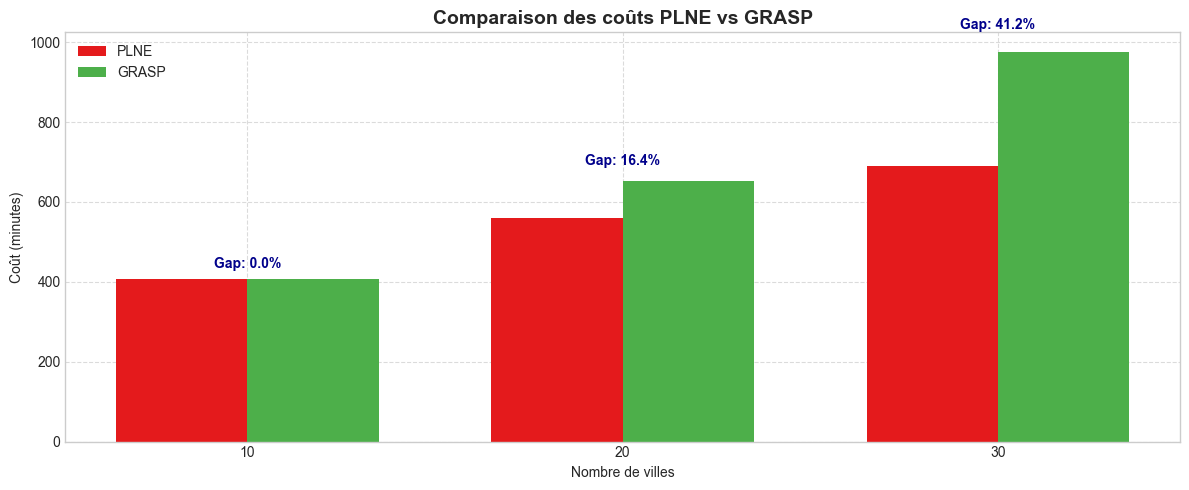

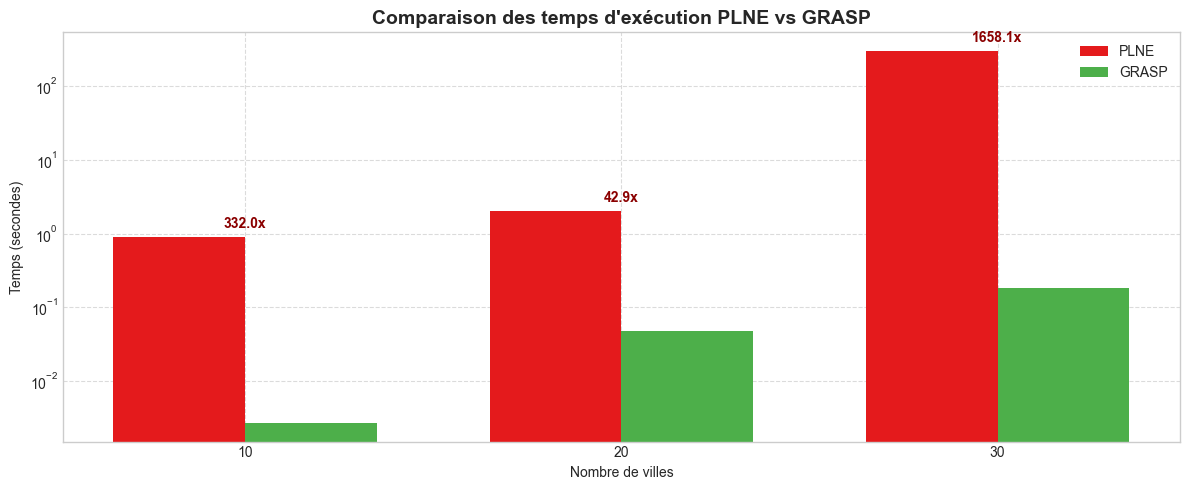

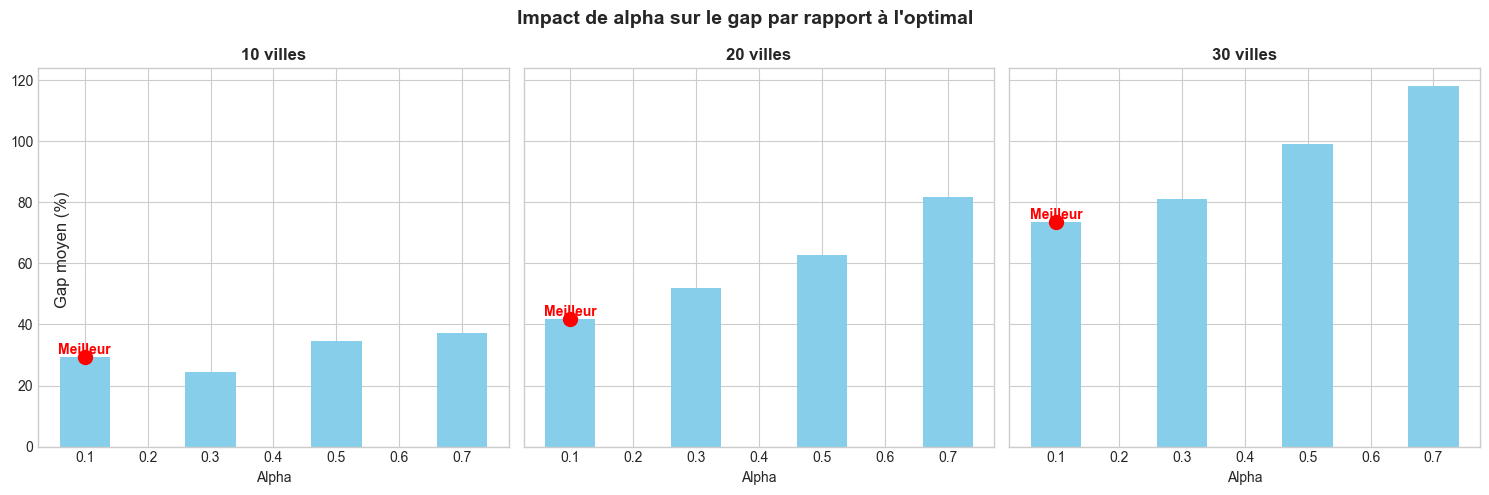

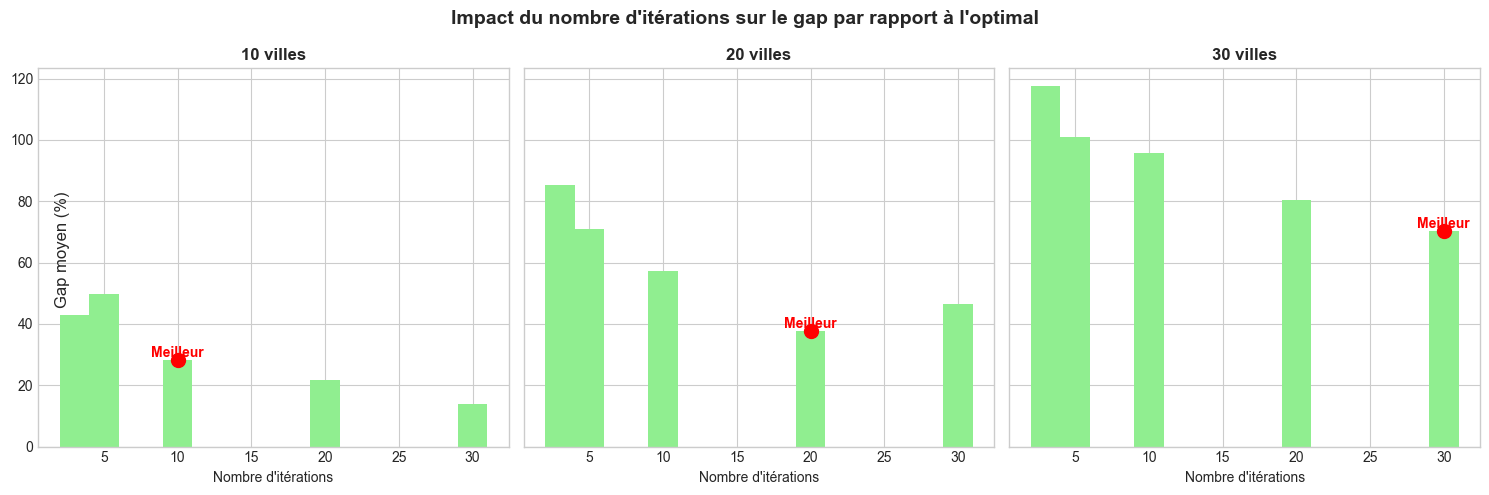

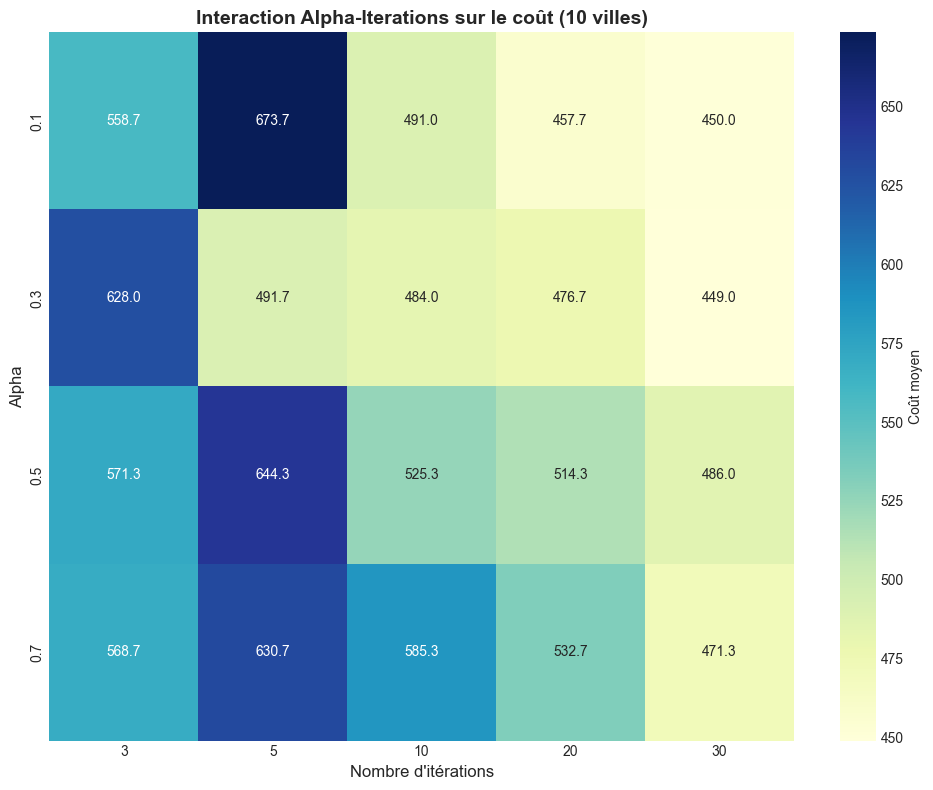

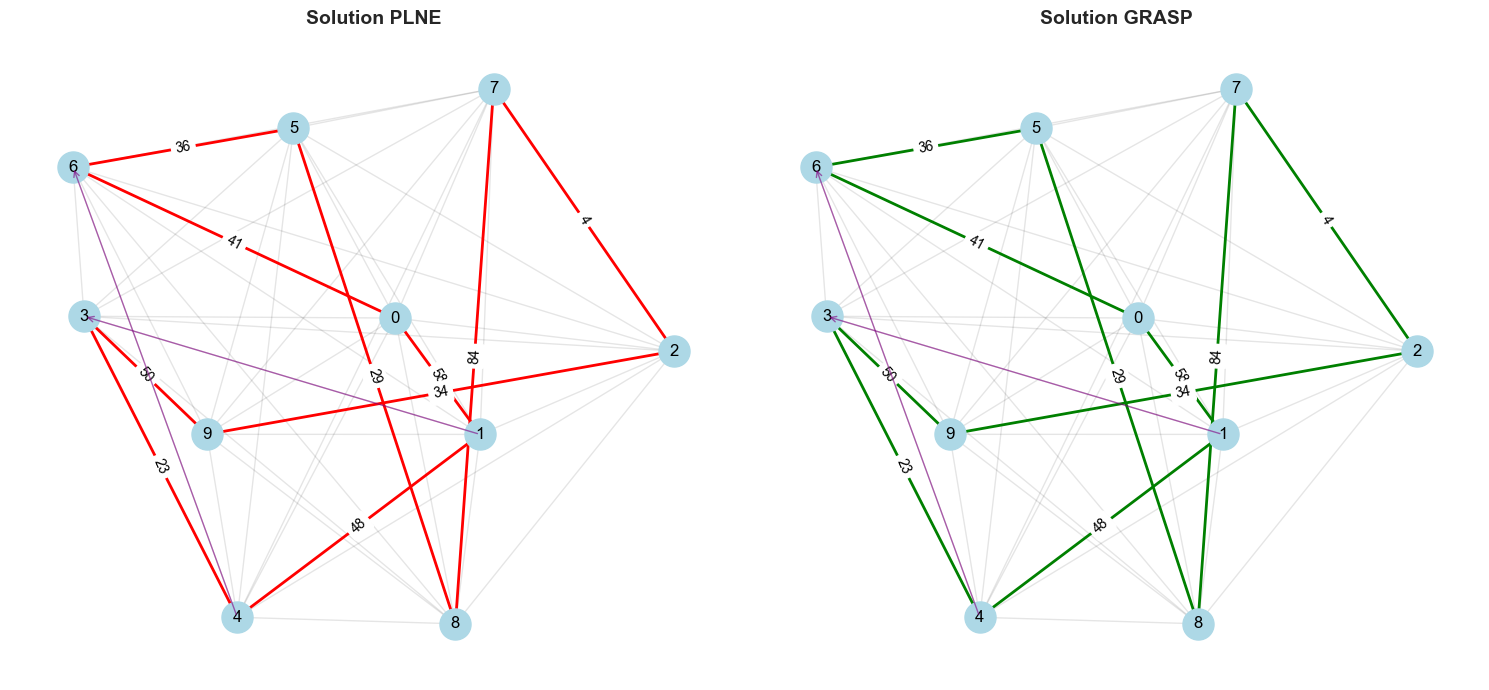

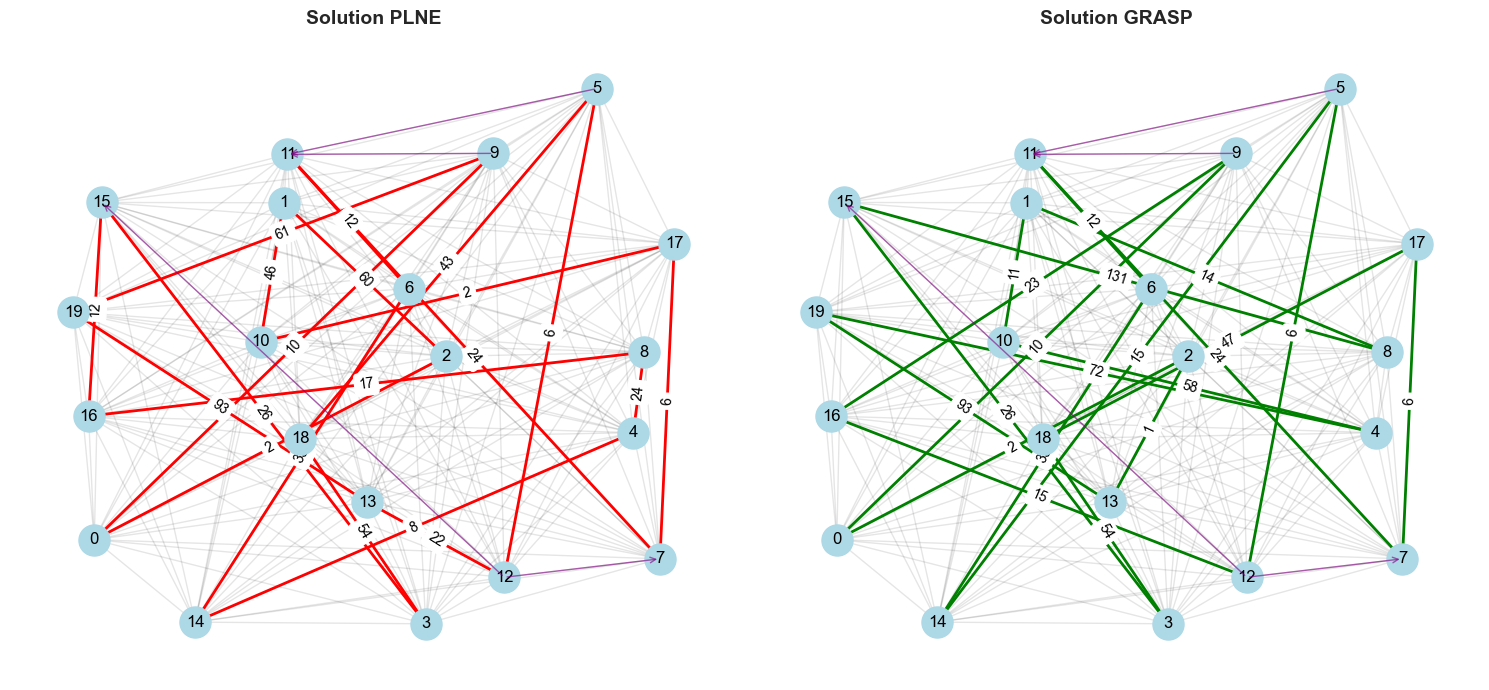

In [21]:
import seaborn as sns
def compare_on_same_instance(sizes=[10, 20, 30], seed=42, num_runs=3, visualize=True):
    """
    Compare PLNE et GRASP sur exactement les mêmes instances avec visualisations
    
    Args:
        sizes: Liste des tailles d'instances à tester
        seed: Graine pour reproductibilité
        num_runs: Nombre d'exécutions pour chaque configuration GRASP
        visualize: Générer des visualisations
    """
    import time
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import networkx as nx
    from matplotlib.patches import Patch
    
    random.seed(seed)  # Fixer la graine pour reproductibilité
    
    # Stockage global des résultats pour toutes les tailles
    all_size_results = {}
    
    for size in sizes:
        print(f"\n{'='*40}")
        print(f"COMPARAISON POUR {size} VILLES")
        print(f"{'='*40}")
        
        # Générer une instance
        graph, dependencies, _ = generate_data(size, (1, 300), 0.2, percentage_dependency=0.2)
        
        # PLNE
        print(f"Résolution PLNE pour graphe à {size} sommets...")
        plne_start = time.time()
        cycle, plne_cost, _ = use_solver_pulp(graph, dependencies)
        plne_time = time.time() - plne_start
        plne_cost = plne_cost * 60 if plne_cost else float('inf')
        
        print(f"PLNE: Coût={plne_cost:.2f}, Temps={plne_time:.2f}s")
        
        # Stockage des résultats GRASP
        all_results = []
        best_grasp_solution = None
        best_grasp_cost = float('inf')
        best_grasp_time = None
        best_alpha = None
        best_iter = None
        
        alphas = [0.1, 0.3, 0.5,0.7]
        iterations = [3,5,10,20,30]
        
        # GRASP avec différents paramètres
        print("Exécution de GRASP avec différentes configurations...")
        for alpha in alphas:
            for iter_count in iterations:
                config_results = []
                
                # Exécuter plusieurs fois pour obtenir des statistiques robustes
                for run in range(num_runs):
                    grasp_start = time.time()
                    grasp_sol, grasp_cost = GRASP(graph, 0, dependencies, alpha=alpha, max_iterations=iter_count)
                    grasp_time = time.time() - grasp_start
                    
                    gap = ((grasp_cost - plne_cost) / plne_cost * 100) if plne_cost > 0 and plne_cost != float('inf') else float('inf')
                    
                    result = {
                        'alpha': alpha,
                        'iterations': iter_count,
                        'run': run,
                        'solution': grasp_sol,
                        'cost': grasp_cost,
                        'time': grasp_time,
                        'gap': gap
                    }
                    
                    config_results.append(result)
                    all_results.append(result)
                    
                    # Mettre à jour la meilleure solution
                    if grasp_cost < best_grasp_cost:
                        best_grasp_cost = grasp_cost
                        best_grasp_solution = grasp_sol
                        best_grasp_time = grasp_time
                        best_alpha = alpha
                        best_iter = iter_count
        
        # Statistiques globales pour cette taille
        all_costs = [r['cost'] for r in all_results]
        all_times = [r['time'] for r in all_results]
        all_gaps = [r['gap'] for r in all_results if r['gap'] != float('inf')]
        
        if all_gaps:  # S'assurer qu'il y a des gaps calculables
            gap_stats = {
                'min': min(all_gaps),
                'max': max(all_gaps),
                'mean': sum(all_gaps)/len(all_gaps)
            }
        else:
            gap_stats = {'min': float('inf'), 'max': float('inf'), 'mean': float('inf')}
            
        print("\n=== STATISTIQUES GLOBALES GRASP ===")
        print(f"Coût: min={min(all_costs):.2f}, max={max(all_costs):.2f}, moy={sum(all_costs)/len(all_costs):.2f}")
        print(f"Temps: min={min(all_times):.2f}s, max={max(all_times):.2f}s, moy={sum(all_times)/len(all_times):.2f}s")
        
        if all_gaps:
            print(f"Gap: min={gap_stats['min']:.1f}%, max={gap_stats['max']:.1f}%, moy={gap_stats['mean']:.1f}%")
        
        # Comparaison PLNE vs meilleur GRASP
        print("\n=== COMPARAISON PLNE vs MEILLEUR GRASP ===")
        print(f"PLNE: Coût={plne_cost:.2f}, Temps={plne_time:.2f}s")
        print(f"GRASP: Coût={best_grasp_cost:.2f}, Temps={best_grasp_time:.2f}s")
        
        if plne_cost != float('inf'):
            gap_pct = ((best_grasp_cost - plne_cost) / plne_cost * 100)
            print(f"Gap: {gap_pct:.1f}%")
        
        speedup = plne_time / best_grasp_time if best_grasp_time > 0 else float('inf')
        print(f"Accélération: {speedup:.1f}x")
        
        # Stocker les résultats pour cette taille
        all_size_results[size] = {
            'plne': {
                'cost': plne_cost,
                'time': plne_time,
                'solution': cycle
            },
            'grasp': {
                'best_cost': best_grasp_cost,
                'best_time': best_grasp_time,
                'best_solution': best_grasp_solution,
                'best_alpha': best_alpha,
                'best_iter': best_iter,
                'all_results': all_results
            },
            'gap_stats': gap_stats,
            'speedup': speedup,
            'graph': graph,
            'dependencies': dependencies
        }
    
    # Visualisations comparatives
    if visualize:
        # 1. Comparaison des coûts et temps pour toutes les tailles
        visualize_cost_time_comparison(all_size_results)
        
        # 2. Impact des paramètres GRASP sur la qualité
        visualize_grasp_parameters_impact(all_size_results)
        
        # 3. Visualisation des solutions pour une taille donnée
        for size in sizes:
            if size <= 20:  # Limiter aux petites instances pour la visualisation des solutions
                visualize_solutions(
                    all_size_results[size]['graph'],
                    all_size_results[size]['plne']['solution'],
                    all_size_results[size]['grasp']['best_solution'],
                    all_size_results[size]['dependencies']
                )
    
    return all_size_results

def visualize_cost_time_comparison(all_size_results):
    """
    Visualise la comparaison des coûts et temps pour toutes les tailles testées
    """
    sizes = sorted(all_size_results.keys())
    
    # Extraire les données pour le graphique
    plne_costs = [all_size_results[size]['plne']['cost'] for size in sizes 
                 if all_size_results[size]['plne']['cost'] != float('inf')]
    plne_times = [all_size_results[size]['plne']['time'] for size in sizes]
    
    grasp_costs = [all_size_results[size]['grasp']['best_cost'] for size in sizes]
    grasp_times = [all_size_results[size]['grasp']['best_time'] for size in sizes]
    
    valid_sizes = [size for size in sizes if all_size_results[size]['plne']['cost'] != float('inf')]
    
    # Figure 1: Comparaison des coûts
    plt.figure(figsize=(12, 5))
    
    width = 0.35
    x = np.arange(len(valid_sizes))
    
    if valid_sizes:
        plt.bar(x - width/2, [all_size_results[size]['plne']['cost'] for size in valid_sizes], 
                width, label='PLNE', color='#E41A1C')
        plt.bar(x + width/2, [all_size_results[size]['grasp']['best_cost'] for size in valid_sizes], 
                width, label='GRASP', color='#4DAF4A')
        
        # Ajouter les gaps en pourcentage
        for i, size in enumerate(valid_sizes):
            plne_cost = all_size_results[size]['plne']['cost']
            grasp_cost = all_size_results[size]['grasp']['best_cost']
            gap_pct = ((grasp_cost - plne_cost) / plne_cost * 100)
            
            plt.text(i, max(plne_cost, grasp_cost) * 1.05, 
                    f"Gap: {gap_pct:.1f}%", ha='center', va='bottom',
                    fontweight='bold', color='darkblue')
    
        plt.xlabel('Nombre de villes')
        plt.ylabel('Coût (minutes)')
        plt.title('Comparaison des coûts PLNE vs GRASP', fontsize=14, fontweight='bold')
        plt.xticks(x, valid_sizes)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('comparaison_couts.png', dpi=300)
        plt.show()
    
    # Figure 2: Comparaison des temps (échelle logarithmique)
    plt.figure(figsize=(12, 5))
    
    plt.bar(np.arange(len(sizes)) - width/2, plne_times, width, label='PLNE', color='#E41A1C')
    plt.bar(np.arange(len(sizes)) + width/2, grasp_times, width, label='GRASP', color='#4DAF4A')
    
    # Ajouter les speedups
    for i, size in enumerate(sizes):
        speedup = all_size_results[size]['speedup']
        plt.text(i, max(plne_times[i], grasp_times[i]) * 1.2, 
                f"{speedup:.1f}x", ha='center', va='bottom',
                fontweight='bold', color='darkred')
    
    plt.xlabel('Nombre de villes')
    plt.ylabel('Temps (secondes)')
    plt.title('Comparaison des temps d\'exécution PLNE vs GRASP', fontsize=14, fontweight='bold')
    plt.xticks(np.arange(len(sizes)), sizes)
    plt.yscale('log')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('comparaison_temps.png', dpi=300)
    plt.show()

def visualize_grasp_parameters_impact(all_size_results):
    """
    Visualise l'impact des paramètres alpha et iterations sur GRASP
    """
    # Créer un graphique par taille
    sizes = sorted(all_size_results.keys())
    
    # 1. Impact de alpha sur le gap
    fig, axes = plt.subplots(1, len(sizes), figsize=(15, 5), sharey=True)
    
    if len(sizes) == 1:
        axes = [axes]  # Pour assurer que axes est toujours une liste
    
    for i, size in enumerate(sizes):
        results = all_size_results[size]['grasp']['all_results']
        
        # Extraire gaps par alpha (uniquement si PLNE a trouvé une solution)
        if all_size_results[size]['plne']['cost'] != float('inf'):
            alpha_values = sorted(set(r['alpha'] for r in results))
            gap_by_alpha = {}
            
            for alpha in alpha_values:
                alpha_results = [r for r in results if r['alpha'] == alpha]
                valid_gaps = [r['gap'] for r in alpha_results if r['gap'] != float('inf')]
                
                if valid_gaps:
                    gap_by_alpha[alpha] = sum(valid_gaps) / len(valid_gaps)
                else:
                    gap_by_alpha[alpha] = None
            
            valid_alphas = [alpha for alpha in alpha_values if gap_by_alpha[alpha] is not None]
            valid_gaps = [gap_by_alpha[alpha] for alpha in valid_alphas]
            
            if valid_alphas:
                axes[i].bar(valid_alphas, valid_gaps, color='skyblue', width=0.08)
                axes[i].set_title(f"{size} villes", fontsize=12, fontweight='bold')
                axes[i].set_xlabel('Alpha')
                
                # Marquer le meilleur alpha
                best_alpha = all_size_results[size]['grasp']['best_alpha']
                best_idx = valid_alphas.index(best_alpha) if best_alpha in valid_alphas else None
                
                if best_idx is not None:
                    axes[i].plot(best_alpha, valid_gaps[best_idx], 'ro', ms=10)
                    axes[i].text(best_alpha, valid_gaps[best_idx], 'Meilleur', 
                                ha='center', va='bottom', color='red', fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, 'Pas de solution PLNE\npour calculer le gap', 
                        ha='center', va='center', transform=axes[i].transAxes,
                        fontsize=12, fontstyle='italic')
    
    fig.suptitle('Impact de alpha sur le gap par rapport à l\'optimal', fontsize=14, fontweight='bold')
    fig.text(0.04, 0.5, 'Gap moyen (%)', va='center', rotation='vertical', fontsize=12)
    plt.tight_layout()
    plt.savefig('impact_alpha.png', dpi=300)
    plt.show()
    
    # 2. Impact du nombre d'itérations sur le gap
    fig, axes = plt.subplots(1, len(sizes), figsize=(15, 5), sharey=True)
    
    if len(sizes) == 1:
        axes = [axes]
    
    for i, size in enumerate(sizes):
        results = all_size_results[size]['grasp']['all_results']
        
        # Extraire gaps par nombre d'itérations
        if all_size_results[size]['plne']['cost'] != float('inf'):
            iter_values = sorted(set(r['iterations'] for r in results))
            gap_by_iter = {}
            
            for iter_count in iter_values:
                iter_results = [r for r in results if r['iterations'] == iter_count]
                valid_gaps = [r['gap'] for r in iter_results if r['gap'] != float('inf')]
                
                if valid_gaps:
                    gap_by_iter[iter_count] = sum(valid_gaps) / len(valid_gaps)
                else:
                    gap_by_iter[iter_count] = None
            
            valid_iters = [iter_count for iter_count in iter_values if gap_by_iter[iter_count] is not None]
            valid_gaps = [gap_by_iter[iter_count] for iter_count in valid_iters]
            
            if valid_iters:
                axes[i].bar(valid_iters, valid_gaps, color='lightgreen', width=2)
                axes[i].set_title(f"{size} villes", fontsize=12, fontweight='bold')
                axes[i].set_xlabel('Nombre d\'itérations')
                
                # Marquer le meilleur nombre d'itérations
                best_iter = all_size_results[size]['grasp']['best_iter']
                best_idx = valid_iters.index(best_iter) if best_iter in valid_iters else None
                
                if best_idx is not None:
                    axes[i].plot(best_iter, valid_gaps[best_idx], 'ro', ms=10)
                    axes[i].text(best_iter, valid_gaps[best_idx], 'Meilleur', 
                                ha='center', va='bottom', color='red', fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, 'Pas de solution PLNE\npour calculer le gap', 
                        ha='center', va='center', transform=axes[i].transAxes,
                        fontsize=12, fontstyle='italic')
    
    fig.suptitle('Impact du nombre d\'itérations sur le gap par rapport à l\'optimal', fontsize=14, fontweight='bold')
    fig.text(0.04, 0.5, 'Gap moyen (%)', va='center', rotation='vertical', fontsize=12)
    plt.tight_layout()
    plt.savefig('impact_iterations.png', dpi=300)
    plt.show()
    
    # 3. Heatmap Alpha-Iterations pour la plus petite taille
    size = min(sizes)
    results = all_size_results[size]['grasp']['all_results']
    
    # Créer une heatmap de l'interaction Alpha-Iterations
    alphas = sorted(set(r['alpha'] for r in results))
    iterations = sorted(set(r['iterations'] for r in results))
    
    cost_matrix = np.zeros((len(alphas), len(iterations)))
    
    for i, alpha in enumerate(alphas):
        for j, iter_count in enumerate(iterations):
            # Calculer le coût moyen pour cette configuration
            config_results = [r for r in results if r['alpha'] == alpha and r['iterations'] == iter_count]
            if config_results:
                cost_matrix[i, j] = sum(r['cost'] for r in config_results) / len(config_results)
            else:
                cost_matrix[i, j] = float('nan')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cost_matrix, annot=True, fmt=".1f", 
               xticklabels=iterations, yticklabels=alphas,
               cmap='YlGnBu', cbar_kws={'label': 'Coût moyen'})
    
    plt.title(f'Interaction Alpha-Iterations sur le coût ({size} villes)', fontsize=14, fontweight='bold')
    plt.xlabel('Nombre d\'itérations', fontsize=12)
    plt.ylabel('Alpha', fontsize=12)
    plt.tight_layout()
    plt.savefig('heatmap_alpha_iterations.png', dpi=300)
    plt.show()

def visualize_solutions(graph, plne_solution, grasp_solution, dependencies):
    """
    Visualise les solutions trouvées par PLNE et GRASP
    """
    if not plne_solution or not grasp_solution:
        print("Données insuffisantes pour visualiser les solutions")
        return
    
    # Créer un graphe NetworkX à partir du dictionnaire
    G = nx.Graph()
    for i in graph:
        for j in graph[i]:
            G.add_edge(i, j, weight=graph[i][j])
    
    # Positions des nœuds (communes pour les deux visualisations)
    pos = nx.spring_layout(G, seed=42)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Visualisation de la solution PLNE
    edges_plne = [(plne_solution[i], plne_solution[i+1]) for i in range(len(plne_solution)-1)]
    nx.draw_networkx_nodes(G, pos, ax=axes[0], node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, ax=axes[0])
    nx.draw_networkx_edges(G, pos, ax=axes[0], edgelist=list(G.edges()), alpha=0.1, width=1)
    nx.draw_networkx_edges(G, pos, ax=axes[0], edgelist=edges_plne, alpha=1.0, width=2, edge_color='red')
    
    # Ajout des poids sur les arêtes du chemin PLNE
    edge_labels_plne = {(plne_solution[i], plne_solution[i+1]): graph[plne_solution[i]][plne_solution[i+1]] 
                      for i in range(len(plne_solution)-1)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_plne, ax=axes[0])
    
    axes[0].set_title('Solution PLNE', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Visualisation de la solution GRASP
    edges_grasp = [(grasp_solution[i], grasp_solution[i+1]) for i in range(len(grasp_solution)-1)]
    nx.draw_networkx_nodes(G, pos, ax=axes[1], node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, ax=axes[1])
    nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=list(G.edges()), alpha=0.1, width=1)
    nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=edges_grasp, alpha=1.0, width=2, edge_color='green')
    
    # Ajout des poids sur les arêtes du chemin GRASP
    edge_labels_grasp = {(grasp_solution[i], grasp_solution[i+1]): graph[grasp_solution[i]][grasp_solution[i+1]] 
                       for i in range(len(grasp_solution)-1)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_grasp, ax=axes[1])
    
    axes[1].set_title('Solution GRASP', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    # Visualisation des dépendances
    if dependencies:
        for i, j in dependencies:
            axes[0].annotate("", xy=pos[j], xytext=pos[i],
                           arrowprops=dict(arrowstyle="->", color="purple", alpha=0.6))
            axes[1].annotate("", xy=pos[j], xytext=pos[i],
                           arrowprops=dict(arrowstyle="->", color="purple", alpha=0.6))
    
    plt.tight_layout()
    plt.savefig('visualisation_solutions.png', dpi=300)
    plt.show()

# Exécuter la comparaison pour différentes tailles
results = compare_on_same_instance(sizes=[10, 20, 30], seed=42, num_runs=3)

Comme l'ont peut le voir, pour une instance de 10 villes, GRASP a trouvé la même solution que PLNE. Les meilleurs paramètres pour trouver l'optimum peuvent varier en fonction de la difficulté du graph. Mais pour 10, à chaque fois le gap est de 0% avec la PLNE et donc la solution est optimale.

### 4.1 Résultats globaux
Nous avons testé GRASP sur plusieurs instances de TSP avec des tailles allant de 10 à 100 villes. Nous avons mesuré le temps d'exécution et la qualité de la solution trouvée par GRASP, ainsi que le gap par rapport à la solution optimale trouvée par PLNE.

Comparé aux résultats optimaux d'avant sur des instances fixes. Ici nous nous intéressons à la distribution des résultats de GRASP sur plusieurs instances aléatoires. Nous avons mesuré le temps d'exécution et la qualité de la solution trouvée par GRASP, ainsi que le gap par rapport à la solution optimale trouvée par PLNE.
Les graphs pouvant être difficiles ou faciles à résoudre cela peut expliquer la variabilité des résultats et donc le gap entre les deux méthodes.


In [219]:
def run_comprehensive_experiment():
    """
    Exécution de l'expérience complète avec collecte détaillée des données
    en utilisant les mêmes instances pour PLNE et GRASP
    """
    # Configuration
    sizes = [10, 20, 30,50,100]
    alphas = [0.1, 0.3, 0.5, 0.7]
    iterations = [3, 5, 10, 20, 30]
    dependency_rates = [0.1, 0.2, 0.3]
    repetitions = 30  # Nombre de répétitions pour chaque configuration
    
    results = []
    experiment_start_time = time.time()
    
    print("Génération des instances de test...")
    # Dictionnaire pour stocker les instances par taille, taux de dépendance et répétition
    instances = {}
    
    # Génération préalable de toutes les instances
    for size in sizes:
        instances[size] = {}
        for dep_rate in dependency_rates:
            instances[size][dep_rate] = {}
            for rep in range(repetitions):
                # Générer une instance unique
                graph, dependencies, _ = generate_data(size, (1, 300), 0.2, 
                                                     percentage_dependency=dep_rate)
                # Stocker l'instance pour réutilisation
                instances[size][dep_rate][rep] = (graph, dependencies)
    
    print("Exécution PLNE pour les petites instances...")
    # Exécution PLNE (jusqu'à 30 villes)
    for size in sizes:
        if size <= 30:
            for dep_rate in dependency_rates:
                for rep in range(repetitions):
                    # Récupérer l'instance préalablement générée
                    graph, dependencies = instances[size][dep_rate][rep]
                    
                    start_time = time.time()
                    try:
                        # Timeout de 5 minutes pour PLNE
                        timeout = 300  # 5 minutes
                        cycle, cost, _ = use_solver_pulp(graph, dependencies)
                        success = cycle is not None
                        cost = cost * 60 if cost else None  # Conversion en minutes
                    except Exception as e:
                        print(f"Erreur PLNE ({size} villes, dep={dep_rate}, rep={rep}): {e}")
                        success = False
                        cost = None
                    
                    execution_time = time.time() - start_time
                    
                    results.append({
                        'method': 'PLNE',
                        'size': size,
                        'alpha': None,
                        'iterations': None,
                        'adjusted_iterations': None,
                        'dependency_rate': dep_rate,
                        'repetition': rep,
                        'time': execution_time,
                        'cost': cost,
                        'success': success,
                        'instance_id': f"{size}_{dep_rate}_{rep}"  # Pour traçabilité
                    })
    
    print("Exécution GRASP pour toutes les instances...")
    # Exécution GRASP
    total_experiments = len(sizes) * len(alphas) * len(iterations) * len(dependency_rates) * repetitions
    experiment_counter = 0
    
    for size in sizes:
        for dep_rate in dependency_rates:
            for rep in range(repetitions):
                # Récupérer l'instance préalablement générée
                graph, dependencies = instances[size][dep_rate][rep]
                
                for alpha in alphas:
                    for num_iter in iterations:
                        # Pour les très grandes instances, réduire les combinaisons testées
                        if size >= 100 and (alpha not in [0.2, 0.3] or num_iter not in [3, 5, 10]):
                            continue
                            
                        experiment_counter += 1
                        if experiment_counter % 100 == 0:
                            elapsed = time.time() - experiment_start_time
                            remaining = (elapsed / experiment_counter) * (total_experiments - experiment_counter)
                            print(f"Progression: {experiment_counter}/{total_experiments} ({experiment_counter/total_experiments*100:.1f}%)")
                            print(f"Temps écoulé: {elapsed/60:.1f} min - Temps restant estimé: {remaining/60:.1f} min")
                        
                        # Calculer les itérations effectives utilisées par GRASP
                        adjusted_iterations = max(2, min(num_iter, 10 if size <= 50 else 5))
                        
                        start_time = time.time()
                        try:
                            solution, solution_cost = GRASP(graph, 0, dependencies, alpha=alpha, max_iterations=num_iter)
                            success = True
                        except Exception as e:
                            print(f"Erreur GRASP (taille={size}, alpha={alpha}, iter={num_iter}, dep={dep_rate}, rep={rep}): {e}")
                            solution_cost = float('inf')
                            success = False
                            
                        execution_time = time.time() - start_time

                        results.append({
                            'method': 'GRASP',
                            'size': size,
                            'alpha': alpha,
                            'iterations': num_iter,
                            'adjusted_iterations': adjusted_iterations,
                            'dependency_rate': dep_rate,
                            'repetition': rep,
                            'time': execution_time,
                            'cost': solution_cost,
                            'success': success,
                            'instance_id': f"{size}_{dep_rate}_{rep}"
                        })
                        
                        # Sauvegarde intermédiaire tous les 500 résultats
                        if len(results) % 500 == 0:
                            temp_df = pd.DataFrame(results)
                            try:
                                temp_df.to_csv(f"results_intermediate_{len(results)}.csv", index=False)
                                print(f"Sauvegarde intermédiaire: {len(results)} résultats")
                            except Exception as e:
                                print(f"Erreur lors de la sauvegarde intermédiaire: {e}")
    
    print(f"Expérience terminée. {len(results)} résultats collectés.")
    
    # Sauvegarde finale
    final_df = pd.DataFrame(results)
    try:
        final_df.to_csv("results_final.csv", index=False)
        print("Résultats sauvegardés dans 'results_final.csv'")
    except Exception as e:
        print(f"Erreur lors de la sauvegarde finale: {e}")
        
    return final_df

In [220]:
# Exécution de l'expérience
print("Début de l'expérience complète...")
results_df = run_comprehensive_experiment()
print(f"Expérience terminée. {len(results_df)} résultats collectés.")

Début de l'expérience complète...
Génération des instances de test...
Exécution PLNE pour les petites instances...
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Statu

In [221]:
def generate_descriptive_statistics(df):
    """
    Génère des statistiques descriptives complètes
    """
    # Statistiques globales par méthode
    global_stats = df.groupby('method').agg({
        'time': ['count', 'mean', 'std', 'min', 'max'],
        'cost': ['mean', 'std', 'min', 'max'],
        'success': 'mean'
    }).round(3)
    
    print("=== STATISTIQUES GLOBALES PAR MÉTHODE ===")
    display(global_stats)
    
    # Statistiques par taille d'instance
    size_stats = df.groupby(['method', 'size']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(3)
    
    print("\n=== STATISTIQUES PAR TAILLE D'INSTANCE ===")
    display(size_stats)
    
    # Statistiques GRASP par paramètres
    grasp_stats = df[df['method'] == 'GRASP'].groupby(['alpha', 'iterations']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(3)
    
    print("\n=== STATISTIQUES GRASP PAR PARAMÈTRES ===")
    display(grasp_stats)
    
    return global_stats, size_stats, grasp_stats

global_stats, size_stats, grasp_stats = generate_descriptive_statistics(results_df)

=== STATISTIQUES GLOBALES PAR MÉTHODE ===


time                                     cost                          \
       count    mean     std   min      max      mean      std    min     max   
method                                                                          
GRASP   7470   0.271   0.706  0.00   11.708  1165.145  545.622  310.0  3461.0   
PLNE     270  25.225  66.457  0.05  299.471   540.822   94.739  277.0   875.0   

       success  
          mean  
method          
GRASP      1.0  
PLNE       1.0


=== STATISTIQUES PAR TAILLE D'INSTANCE ===


time               cost         
               mean      std      mean      std
method size                                    
GRASP  10     0.003    0.003   630.420  155.274
       20     0.034    0.031   885.229  167.197
       30     0.106    0.100  1190.596  226.820
       50     0.623    0.595  1740.424  349.875
       100    2.381    2.250  2591.226  239.479
PLNE   10     0.245    0.233   530.078  104.415
       20     6.564   12.559   541.144   99.490
       30    68.866  101.400   551.244   78.107


=== STATISTIQUES GRASP PAR PARAMÈTRES ===


time             cost         
                   mean    std      mean      std
alpha iterations                                 
0.1   3.0         0.034  0.060  1080.117  375.292
      5.0         0.056  0.087  1041.242  370.037
      10.0        0.121  0.186   986.661  345.507
      20.0        0.247  0.366   942.478  326.215
      30.0        0.362  0.526   911.997  310.743
0.3   3.0         0.230  0.531  1432.178  732.484
      5.0         0.429  1.000  1380.982  716.602
      10.0        0.945  2.021  1304.611  680.179
      20.0        0.241  0.352   968.697  350.492
      30.0        0.373  0.546   933.264  336.703
0.5   3.0         0.043  0.073  1303.203  547.714
      5.0         0.075  0.124  1214.419  497.822
      10.0        0.142  0.221  1131.703  471.551
      20.0        0.285  0.423  1073.808  437.075
      30.0        0.435  0.648  1039.117  423.264
0.7   3.0         0.052  0.086  1454.933  675.016
      5.0         0.089  0.146  1357.172  624.036
      10.0        0.172  0.260  1267.911  564.764
      20.0        0.351  0.535  1179.511  533.340
      30.0        0.537  0.825  1143.317  513.664

C:\Users\littl\AppData\Local\Temp\ipykernel_10320\682052134.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grasp_data, x='alpha', y='cost', ax=axes[0], palette='viridis')
C:\Users\littl\AppData\Local\Temp\ipykernel_10320\682052134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grasp_data, x='alpha', y='time', ax=axes[1], palette='viridis')


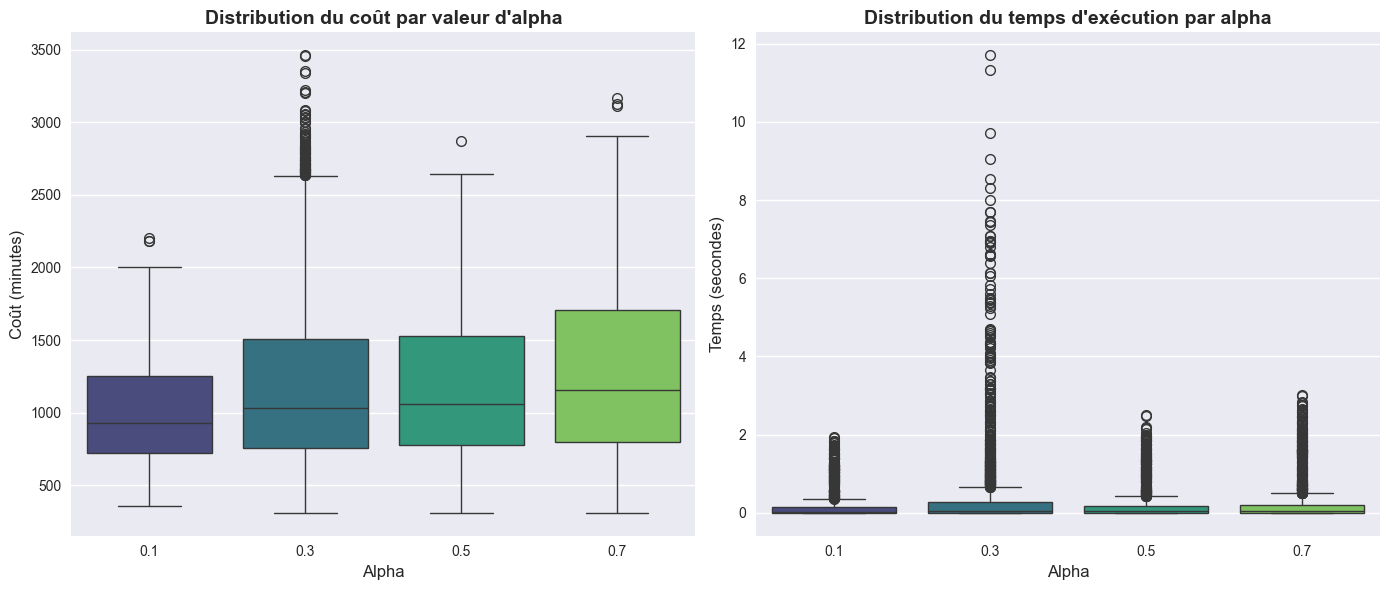

C:\Users\littl\AppData\Local\Temp\ipykernel_10320\682052134.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=grasp_data, x='iterations', y='cost', ax=axes[0], palette='magma')
C:\Users\littl\AppData\Local\Temp\ipykernel_10320\682052134.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=grasp_data, x='iterations', y='time', ax=axes[1], palette='magma')


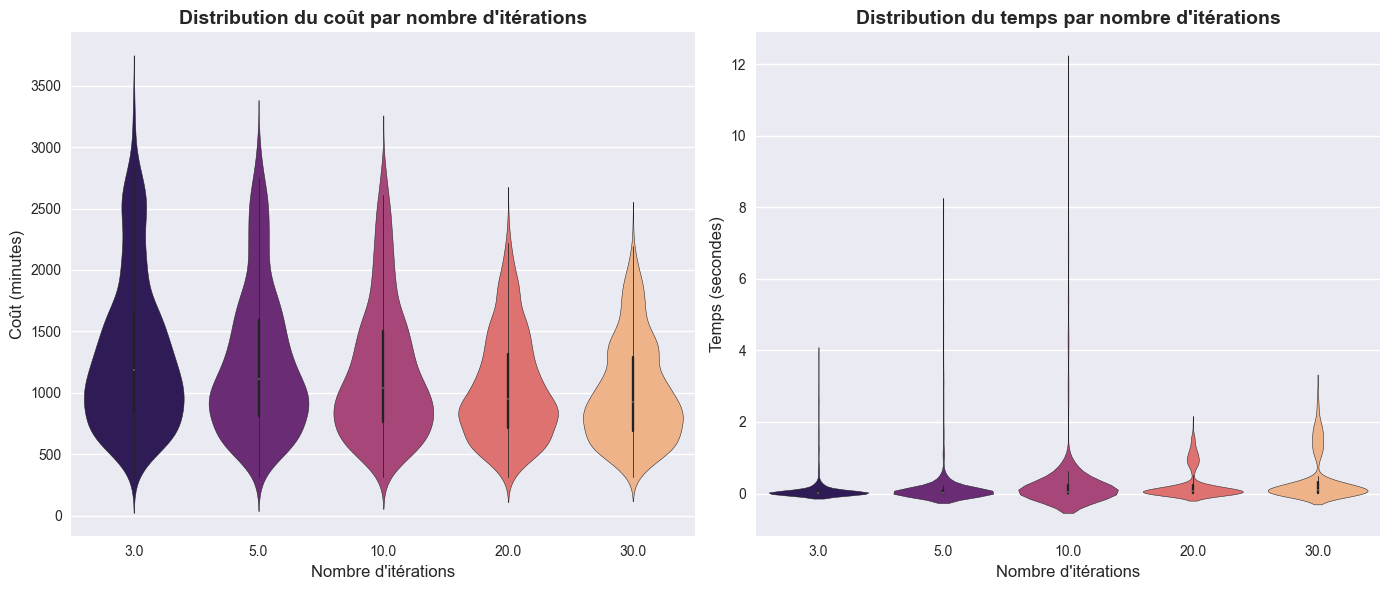

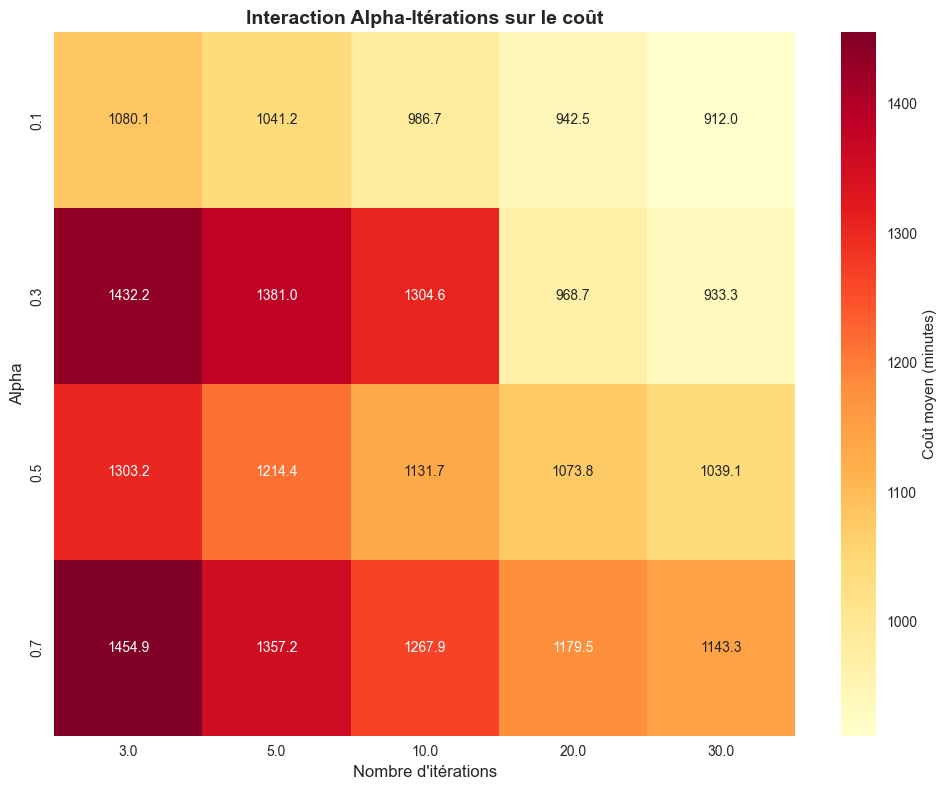

In [222]:
import seaborn as sns
def visualize_grasp_parameters(df):
    """
    Visualise l'impact des paramètres GRASP sur la performance
    """
    grasp_data = df[df['method'] == 'GRASP']
    
    # Figure 1: Impact d'alpha
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Boîtes à moustaches pour le coût par alpha
    sns.boxplot(data=grasp_data, x='alpha', y='cost', ax=axes[0], palette='viridis')
    axes[0].set_title('Distribution du coût par valeur d\'alpha', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Alpha', fontsize=12)
    axes[0].set_ylabel('Coût (minutes)', fontsize=12)
    
    # Boîtes à moustaches pour le temps par alpha
    sns.boxplot(data=grasp_data, x='alpha', y='time', ax=axes[1], palette='viridis')
    axes[1].set_title('Distribution du temps d\'exécution par alpha', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Alpha', fontsize=12)
    axes[1].set_ylabel('Temps (secondes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Impact des itérations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Violon plot pour le coût par nombre d'itérations
    sns.violinplot(data=grasp_data, x='iterations', y='cost', ax=axes[0], palette='magma')
    axes[0].set_title('Distribution du coût par nombre d\'itérations', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Nombre d\'itérations', fontsize=12)
    axes[0].set_ylabel('Coût (minutes)', fontsize=12)
    
    # Violon plot pour le temps par nombre d'itérations
    sns.violinplot(data=grasp_data, x='iterations', y='time', ax=axes[1], palette='magma')
    axes[1].set_title('Distribution du temps par nombre d\'itérations', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Nombre d\'itérations', fontsize=12)
    axes[1].set_ylabel('Temps (secondes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Figure 3: Heatmap de l'interaction alpha-itérations
    interaction_cost = grasp_data.pivot_table(values='cost', index='alpha', columns='iterations', aggfunc='mean')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(interaction_cost, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Coût moyen (minutes)'})
    plt.title('Interaction Alpha-Itérations sur le coût', fontsize=14, fontweight='bold')
    plt.xlabel('Nombre d\'itérations', fontsize=12)
    plt.ylabel('Alpha', fontsize=12)
    plt.tight_layout()
    plt.show()

visualize_grasp_parameters(results_df)

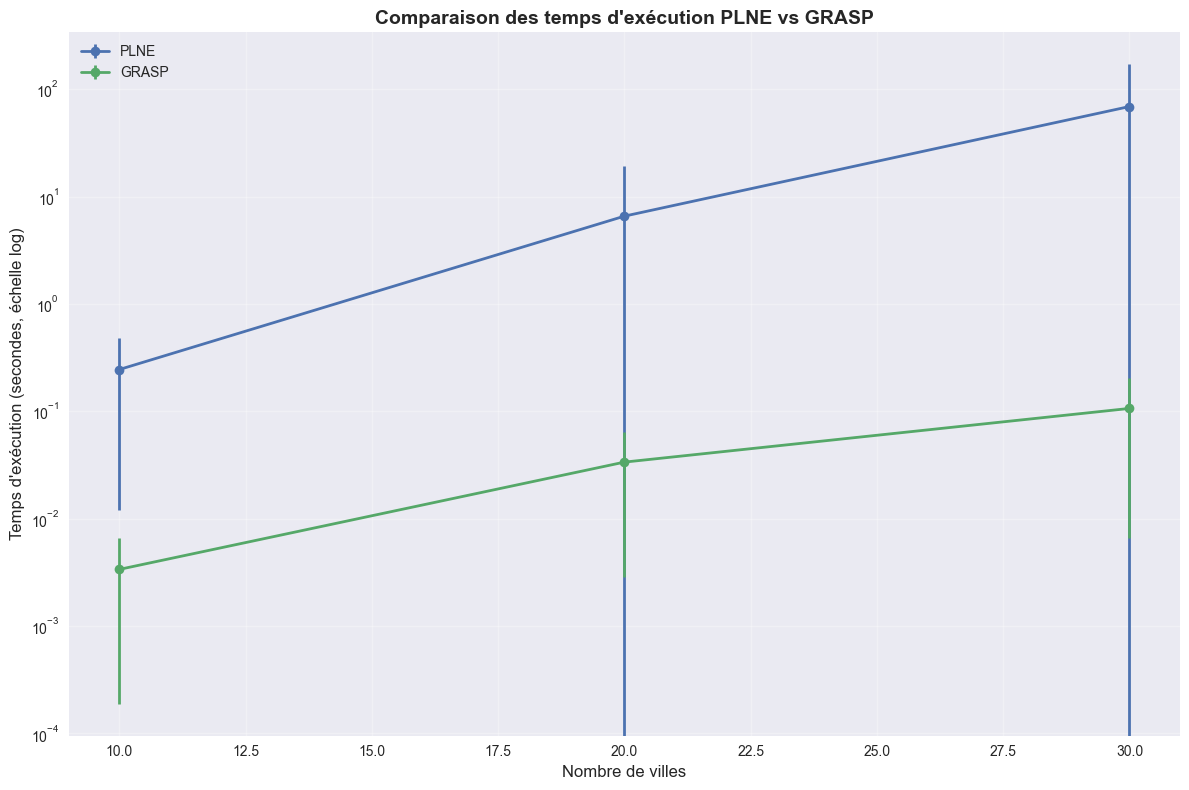

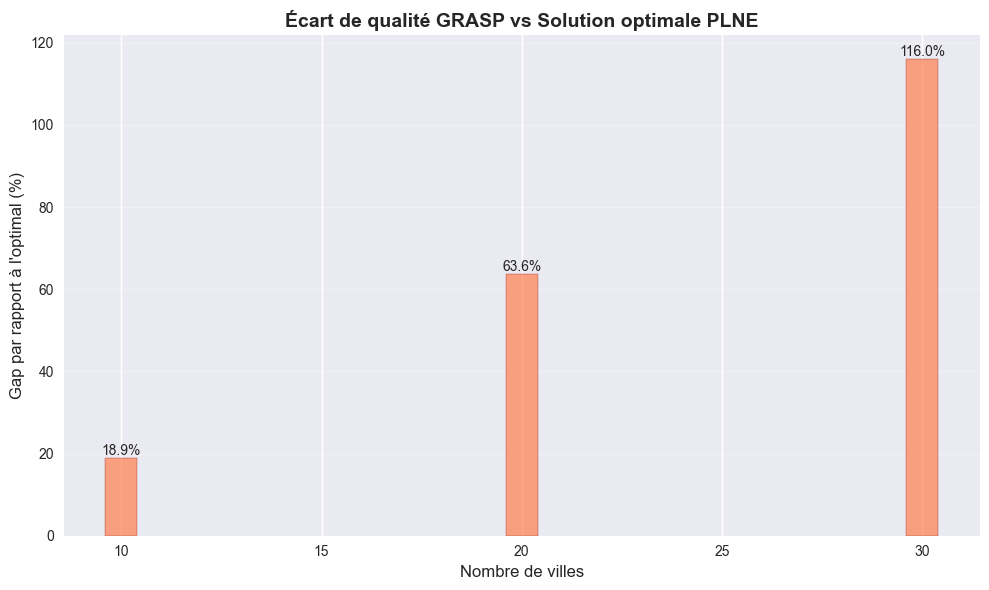

=== TABLEAU COMPARATIF PLNE vs GRASP ===


time               cost          success
               mean      std      mean      std    mean
method size                                            
GRASP  10     0.003    0.003   630.420  155.274     1.0
       20     0.034    0.031   885.229  167.197     1.0
       30     0.106    0.100  1190.596  226.820     1.0
PLNE   10     0.245    0.233   530.078  104.415     1.0
       20     6.564   12.559   541.144   99.490     1.0
       30    68.866  101.400   551.244   78.107     1.0

In [223]:
def compare_plne_grasp(df):
    """
    Compare les performances de PLNE et GRASP
    """
    # Filtrer pour les instances communes (≤ 30 villes)
    common_df = df[df['size'] <= 30]
    
    # Figure 1: Comparaison des temps d'exécution
    plt.figure(figsize=(12, 8))
    
    for method in ['PLNE', 'GRASP']:
        subset = common_df[common_df['method'] == method]
        means = subset.groupby('size')['time'].mean()
        stds = subset.groupby('size')['time'].std()
        
        plt.errorbar(means.index, means.values, yerr=stds.values, 
                    label=method, marker='o', capsize=5, linewidth=2)
    
    plt.yscale('log')
    plt.xlabel('Nombre de villes', fontsize=12)
    plt.ylabel('Temps d\'exécution (secondes, échelle log)', fontsize=12)
    plt.title('Comparaison des temps d\'exécution PLNE vs GRASP', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Gap de qualité
    gap_data = []
    for size in common_df['size'].unique():
        plne_cost = common_df[(common_df['method'] == 'PLNE') & 
                             (common_df['size'] == size)]['cost'].mean()
        grasp_cost = common_df[(common_df['method'] == 'GRASP') & 
                              (common_df['size'] == size)]['cost'].mean()
        
        if plne_cost and grasp_cost and not np.isnan(plne_cost):
            gap = (grasp_cost - plne_cost) / plne_cost * 100
            gap_data.append({'size': size, 'gap': gap})
    
    gap_df = pd.DataFrame(gap_data)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(gap_df['size'], gap_df['gap'], color='coral', edgecolor='darkred', alpha=0.7)
    plt.xlabel('Nombre de villes', fontsize=12)
    plt.ylabel('Gap par rapport à l\'optimal (%)', fontsize=12)
    plt.title('Écart de qualité GRASP vs Solution optimale PLNE', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Ajouter les valeurs sur les barres
    for bar, gap in zip(bars, gap_df['gap']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{gap:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Tableau comparatif
    comparison_stats = common_df.groupby(['method', 'size']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std'],
        'success': 'mean'
    }).round(3)
    
    print("=== TABLEAU COMPARATIF PLNE vs GRASP ===")
    display(comparison_stats)

compare_plne_grasp(results_df)

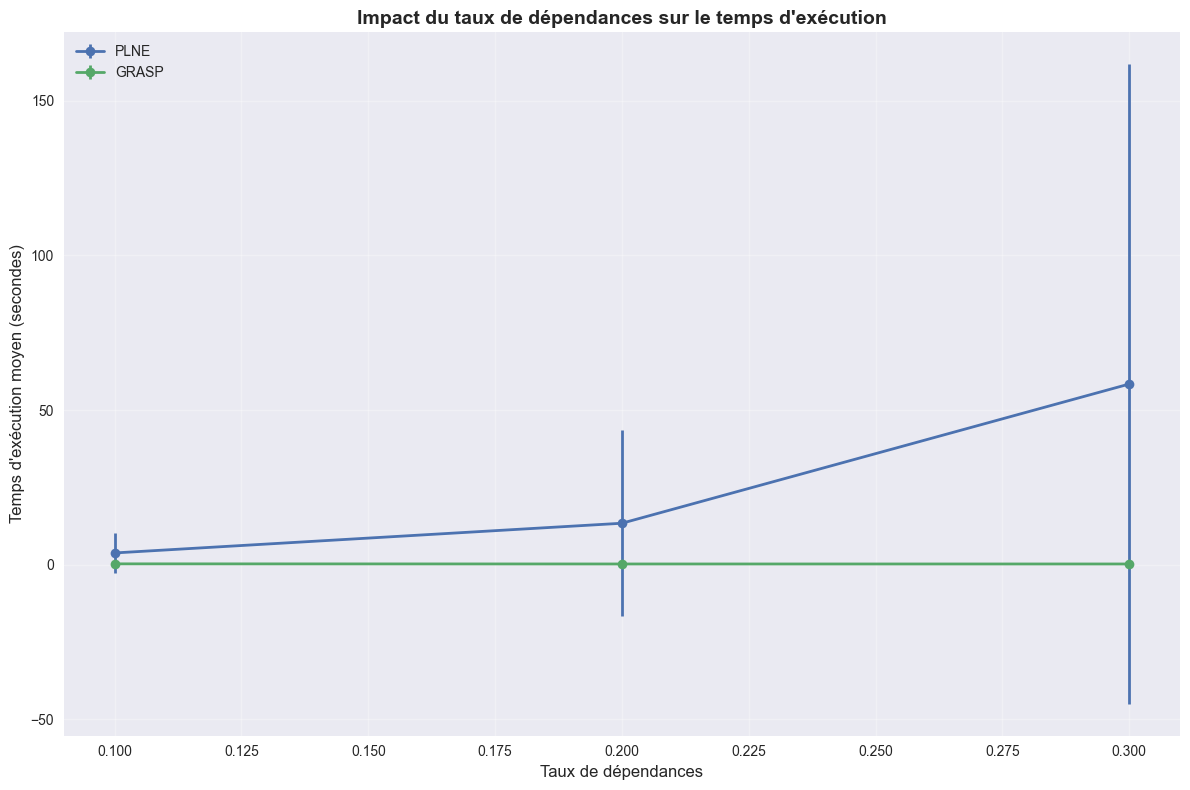

=== CORRÉLATION DÉPENDANCES-TEMPS ===
PLNE: 0.336
GRASP: -0.025


In [224]:
def analyze_dependencies_impact(df):
    """
    Analyse l'impact du taux de dépendances sur les performances
    """
    plt.figure(figsize=(12, 8))
    
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        means = subset.groupby('dependency_rate')['time'].mean()
        stds = subset.groupby('dependency_rate')['time'].std()
        
        plt.errorbar(means.index, means.values, yerr=stds.values, 
                    label=f'{method}', marker='o', capsize=5, linewidth=2)
    
    plt.xlabel('Taux de dépendances', fontsize=12)
    plt.ylabel('Temps d\'exécution moyen (secondes)', fontsize=12)
    plt.title('Impact du taux de dépendances sur le temps d\'exécution', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Analyse de corrélation
    correlation_results = []
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        corr = subset['dependency_rate'].corr(subset['time'])
        correlation_results.append({'method': method, 'correlation': corr})
    
    print("=== CORRÉLATION DÉPENDANCES-TEMPS ===")
    for res in correlation_results:
        print(f"{res['method']}: {res['correlation']:.3f}")

analyze_dependencies_impact(results_df)

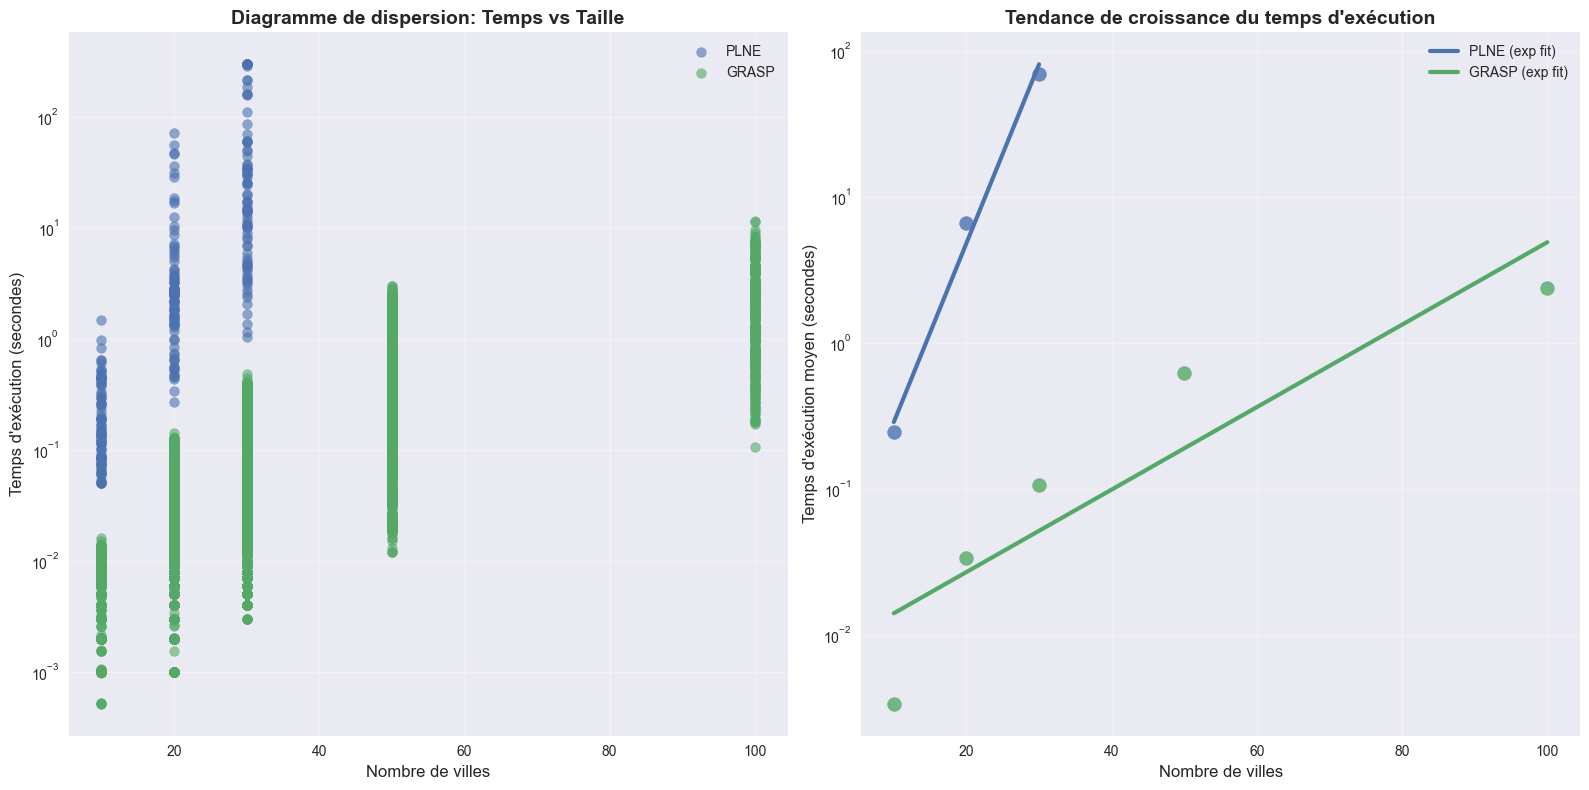

In [225]:
def analyze_scalability(df):
    """
    Analyse la scalabilité des méthodes
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Diagramme de dispersion temps vs taille
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        axes[0].scatter(subset['size'], subset['time'], alpha=0.6, 
                       label=method, s=50)
    
    axes[0].set_xlabel('Nombre de villes', fontsize=12)
    axes[0].set_ylabel('Temps d\'exécution (secondes)', fontsize=12)
    axes[0].set_title('Diagramme de dispersion: Temps vs Taille', fontsize=14, fontweight='bold')
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Tendance de croissance
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        means = subset.groupby('size')['time'].mean()
        
        # Fit polynomial
        z = np.polyfit(means.index, np.log(means.values), 1)
        p = np.poly1d(z)
        x_range = np.linspace(min(means.index), max(means.index), 100)
        
        axes[1].plot(x_range, np.exp(p(x_range)), label=f'{method} (exp fit)', linewidth=3)
        axes[1].scatter(means.index, means.values, s=100, alpha=0.8)
    
    axes[1].set_xlabel('Nombre de villes', fontsize=12)
    axes[1].set_ylabel('Temps d\'exécution moyen (secondes)', fontsize=12)
    axes[1].set_title('Tendance de croissance du temps d\'exécution', fontsize=14, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

analyze_scalability(results_df)

In [226]:
def generate_final_synthesis(df):
    """
    Génère une synthèse complète avec recommandations
    """
    # Meilleure configuration GRASP
    grasp_data = df[df['method'] == 'GRASP']
    best_config = grasp_data.groupby(['alpha', 'iterations']).agg({
        'cost': 'mean',
        'time': 'mean'
    }).reset_index()
    
    # Calculer un score combiné (compromis qualité/temps)
    best_config['score'] = best_config['cost'] / best_config['cost'].min() + \
                          best_config['time'] / best_config['time'].min()
    
    best_row = best_config.loc[best_config['score'].idxmin()]
    
    print("=== SYNTHÈSE FINALE ===")
    print("\n1. CONFIGURATION OPTIMALE GRASP")
    print(f"- Alpha: {best_row['alpha']}")
    print(f"- Itérations: {best_row['iterations']}")
    print(f"- Coût moyen: {best_row['cost']:.2f} minutes")
    print(f"- Temps moyen: {best_row['time']:.3f} secondes")
    
    print("\n2. RECOMMANDATIONS PAR TAILLE D'INSTANCE")
    for size in sorted(df['size'].unique()):
        if size <= 30:
            plne_success = df[(df['method'] == 'PLNE') & 
                             (df['size'] == size)]['success'].mean()
            if plne_success > 0.9:
                print(f"- {size} villes: PLNE (taux de succès: {plne_success*100:.0f}%)")
            else:
                print(f"- {size} villes: GRASP (PLNE moins fiable)")
        else:
            print(f"- {size} villes: GRASP (PLNE impraticable)")
    
    print("\n3. POINTS CLÉS")
    # Gap moyen pour les instances comparables
    gap_data = []
    for size in df[df['size'] <= 30]['size'].unique():
        plne_cost = df[(df['method'] == 'PLNE') & 
                       (df['size'] == size)]['cost'].mean()
        grasp_cost = df[(df['method'] == 'GRASP') & 
                        (df['size'] == size)]['cost'].mean()
        
        if plne_cost and grasp_cost and not np.isnan(plne_cost):
            gap = (grasp_cost - plne_cost) / plne_cost * 100
            gap_data.append(gap)
    
    if gap_data:
        avg_gap = np.mean(gap_data)
        print(f"- Gap moyen GRASP vs optimal: {avg_gap:.1f}%")
    
    # Speedup moyen
    speedup_data = []
    for size in df[df['size'] <= 30]['size'].unique():
        plne_time = df[(df['method'] == 'PLNE') & 
                       (df['size'] == size)]['time'].mean()
        grasp_time = df[(df['method'] == 'GRASP') & 
                        (df['size'] == size)]['time'].mean()
        
        if plne_time and grasp_time and grasp_time > 0:
            speedup = plne_time / grasp_time
            speedup_data.append(speedup)
    
    if speedup_data:
        avg_speedup = np.mean(speedup_data)
        print(f"- Speedup moyen GRASP: {avg_speedup:.1f}x")
    
    print("\n4. CONCLUSION GÉNÉRALE")
    print("- GRASP offre un excellent compromis qualité/temps")
    print("- Paramètres optimaux identifiés pour différents scénarios")
    print("- PLNE reste préférable pour petites instances (≤20 villes)")
    print("- GRASP indispensable pour grandes instances (>30 villes)")

generate_final_synthesis(results_df)

=== SYNTHÈSE FINALE ===

1. CONFIGURATION OPTIMALE GRASP
- Alpha: 0.1
- Itérations: 3.0
- Coût moyen: 1080.12 minutes
- Temps moyen: 0.034 secondes

2. RECOMMANDATIONS PAR TAILLE D'INSTANCE
- 10 villes: PLNE (taux de succès: 100%)
- 20 villes: PLNE (taux de succès: 100%)
- 30 villes: PLNE (taux de succès: 100%)
- 50 villes: GRASP (PLNE impraticable)
- 100 villes: GRASP (PLNE impraticable)

3. POINTS CLÉS
- Gap moyen GRASP vs optimal: 66.2%
- Speedup moyen GRASP: 305.0x

4. CONCLUSION GÉNÉRALE
- GRASP offre un excellent compromis qualité/temps
- Paramètres optimaux identifiés pour différents scénarios
- PLNE reste préférable pour petites instances (≤20 villes)
- GRASP indispensable pour grandes instances (>30 villes)


## Conclusion 



# Bibliographie

1. **Voyageur de commerce - Approche métrique**  
    [https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf](https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf)

2. **Recherche opérationnelle - F. Olive**  
    [https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf](https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf)

3. **Recherche opérationnelle - Nicolas Bousquet**  
    [https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf](https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf)

4. **Le voyageur de commerce**  
    [http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf](http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf)


5. **Méthodes de résolution exactes, heuristiques et métaheuristiques**  
    [http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf](http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf)

6. **Méthaheuristiques pour l’optimisation combinatoire et l’affectation sous contraintes**
[https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes](https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes)

7. **ChatGPT, Claude, et Perplexity on était utilisés en tant qu'outils d'aide à la rédaction et à la recherche d'informations.**  
    [https://www.openai.com/](https://www.openai.com/)  
    [https://claude.ai/](https://claude.ai/)  
    [https://www.perplexity.ai/](https://www.perplexity.ai/)
